Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 14

In [1]:
num_days_R_prediction=14

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=8 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.939110   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -27.469800   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -42.882100   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.025885   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  17.189900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.939110   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -27.469800   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -42.882100   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.025885   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  17.189900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region        Lat        Long  \
185            NaN                            Poland  51.919400   19.145100   
186            NaN                          Portugal  39.399900   -8.224500   
187            NaN                             Qatar  25.354800   51.183900   
188            NaN                           Romania  45.943200   24.966800   
189            NaN                            Russia  61.524010  105.318756   
190            NaN                            Rwanda  -1.940300   29.873900   
191            NaN                       Saint Lucia  13.909400  -60.978900   
192            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
193            NaN                        San Marino  43.942400   12.457800   
194            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/10/20  \
185        0        0        0        0        0        0  ...     1562   
186        0        0        0        0        0        0  ...     1646   
187        0        0        0        0        0        0  ...      146   
188        0        0        0        0        0        0  ...     1847   
189        0        0        0        0        0        0  ...    11000   
190        0        0        0        0        0        0  ...        3   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       42   
194        0        0        0        0        0        0  ...     2151   

     7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  \
185     1568     1571     1576     1588     1594     1605     1612   
186     1654     1660     1662     1668     1676     1679     1682   
187      146      147      149      150      151      152      153   
188     1871     1884     1901     1931     1952     1971     1988   
189    11188    11318    11422    11597    11753    11920    12106   
190        4        4        4        4        4        4        4   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193       42       42       42       42       42       42       42   
194     2181     2223     2243     2283     2325     2370     2407   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 184 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
175            NaN              Oman  21.512583   55.923255        0        0   
176            NaN          Pakistan  30.375300   69.345100        0        0   
177            NaN            Panama   8.538000  -80.782100        0        0   
178            NaN  Papua New Guinea  -6.314993  143.955550        0        0   
179            NaN          Paraguay -23.442500  -58.443800        0        0   
180            NaN              Peru  -9.190000  -75.015200        0        0   
181            NaN       Philippines  12.879721  121.774017        0        0   
182            NaN            Poland  51.919400   19.145100        0        0   
183            NaN          Portugal  39.399900   -8.224500        0        0   
184            NaN             Qatar  25.354800   51.183900        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  7/10/20  7/11/20  7/12/20  \
175        0        0        0        0  ...    34225    35255    36098   
176        0        0        0        0  ...   153134   156700   161917   
177        0        0        0        0  ...    21426    22170    23039   
178        0        0        0        0  ...        8        8        8   
179        0        0        0        0  ...     1256     1261     1275   
180        0        0        0        0  ...   210638   214152   217111   
181        0        0        0        0  ...    13230    14037    16046   
182        0        0        0        0  ...    26048    26635    27148   
183        0        0        0        0  ...    30350    30655    30907   
184        0        0        0        0  ...    98233    98934    99743   

     7/13/20  7/14/20  7/15/20  7/16/20  7/17/20   Population   \
175    37257    37987    39038    40090    41450     4,636,000   
176   170656   172810   178737   178737   198509   197,000,000   
177    23919    24667    25417    25842    26520     4,299,739   
178        8        8        8        8        8           NaN   
179     1293     1308     1338     1379     1481     7,111,652   
180   221008   223261   226400   230994   233982    32,870,710   
181    20371    20459    20976    21440    21748   104,900,000   
182    27515    27756    28492    28928    29505    37,980,000   
183    31065    31550    32110    32476    32790    10,290,000   
184   100627   101160   101637   102168   102597     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 184 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region        Lat        Long  \
185            NaN                            Poland  51.919400   19.145100   
186            NaN                          Portugal  39.399900   -8.224500   
187            NaN                             Qatar  25.354800   51.183900   
188            NaN                           Romania  45.943200   24.966800   
189            NaN                            Russia  61.524010  105.318756   
190            NaN                            Rwanda  -1.940300   29.873900   
191            NaN                       Saint Lucia  13.909400  -60.978900   
192            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
193            NaN                        San Marino  43.942400   12.457800   
194            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/10/20  \
185        0        0        0        0        0        0  ...    37216   
186        0        0        0        0        0        0  ...    45679   
187        0        0        0        0        0        0  ...   102630   
188        0        0        0        0        0        0  ...    31381   
189        0        0        0        0        0        0  ...   712863   
190        0        0        0        0        0        0  ...     1252   
191        0        0        0        0        0        0  ...       22   
192        0        0        0        0        0        0  ...       29   
193        0        0        0        0        0        0  ...      699   
194        0        0        0        0        0        0  ...   226486   

     7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  \
185    37521    37891    38190    38457    38721    39054    39407   
186    46221    46512    46818    47051    47426    47765    48077   
187   103128   103598   104016   104533   104983   105477   105898   
188    32079    32535    32948    33585    34226    35003    35802   
189   719449   726036   732547   738787   745197   751612   758001   
190     1299     1337     1378     1416     1435     1473     1485   
191       22       22       22       22       22       23       23   
192       29       35       35       35       35       35       35   
193      699      699      699      699      699      699      699   
194   229480   232259   235111   237803   240474   243238   245851   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 184 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region        Lat        Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.313300  -81.254600        0        0   
221  Channel Islands  United Kingdom  49.372300   -2.364400        0        0   
222        Gibraltar  United Kingdom  36.140800   -5.353600        0        0   
223      Isle of Man  United Kingdom  54.236100   -4.548100        0        0   
224       Montserrat  United Kingdom  16.742498  -62.187366        0        0   
225              NaN  United Kingdom  55.378100   -3.436000        0        0   
226              NaN         Uruguay -32.522800  -55.765800        0        0   
227              NaN   United States  40.000000 -100.000000        1        1   
228              NaN      Uzbekistan  41.377491   64.585262        0        0   
229              NaN       Venezuela   6.423800  -66.589700        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  7/10/20  7/11/20  7/12/20  \
220        0        0        0        0  ...      201      201      201   
221        0        0        0        0  ...      577      577      577   
222        0        0        0        0  ...      180      180      180   
223        0        0        0        0  ...      336      336      336   
224        0        0        0        0  ...       11       12       12   
225        0        0        0        0  ...   288133   288953   289603   
226        0        0        0        0  ...      985      986      987   
227        2        2        5        5  ...  3185737  3245925  3304942   
228        0        0        0        0  ...    12027    12513    12997   
229        0        0        0        0  ...     8803     9178     9465   

     7/13/20  7/14/20  7/15/20  7/16/20  7/17/20   Population   \
220      203      203      203      203      203           NaN   
221      581      581      581      583      583       173,519   
222      180      180      180      180      180        33,693   
223      336      336      336      336      336        84,939   
224       12       12       12       12       12         4,991   
225   290133   291373   291911   292552   293239    66,440,000   
226      989      997     1009     1026     1037     3,471,150   
227  3364157  3431574  3498902  3576157  3647715   327,200,000   
228    13591    14085    14581    15066    15607    33,363,556   
229     9707    10010    10428    10854    11191           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 184 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

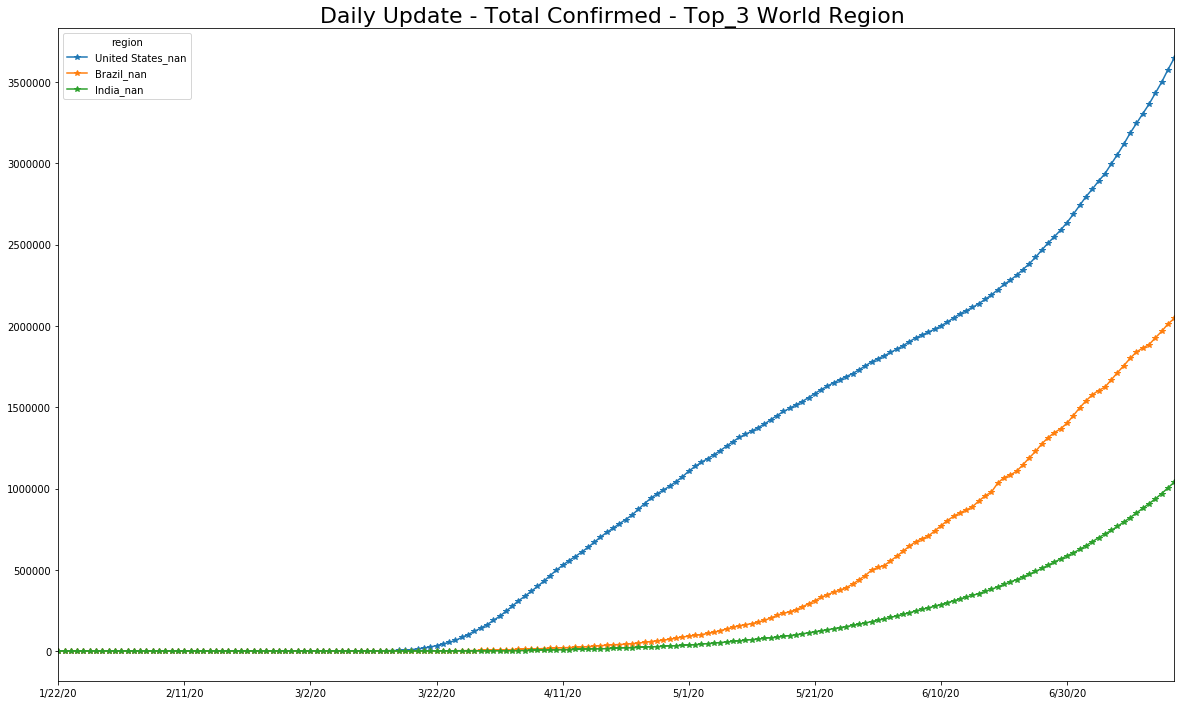

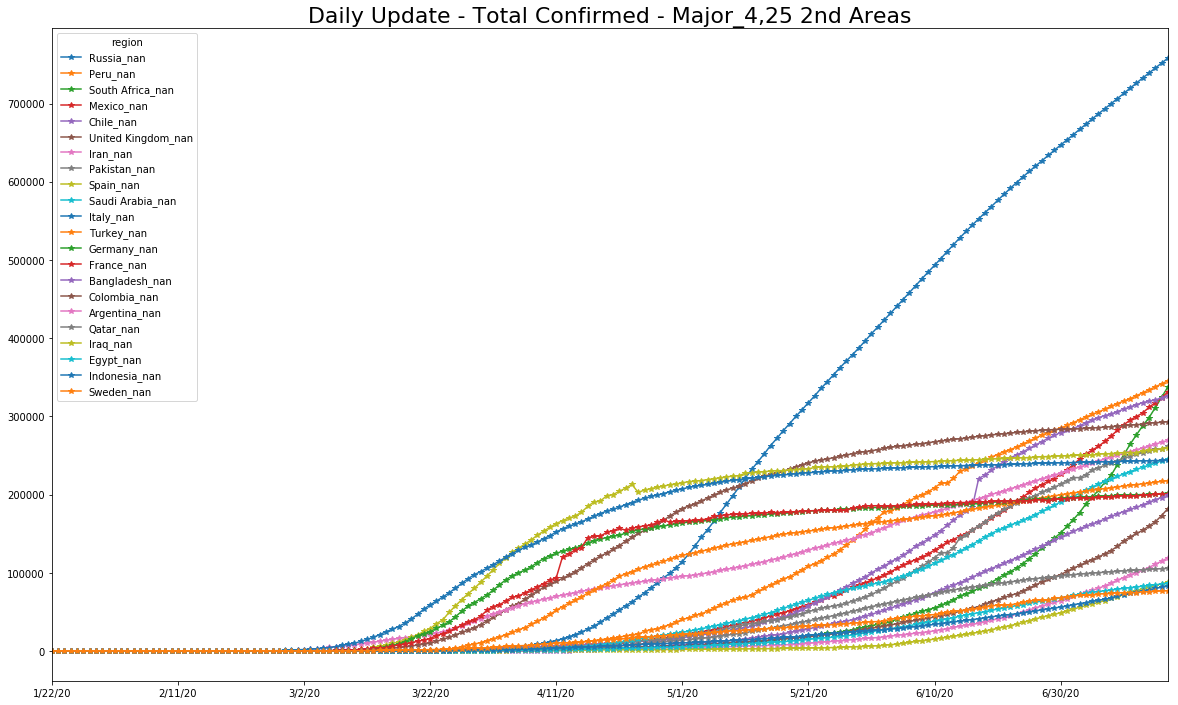

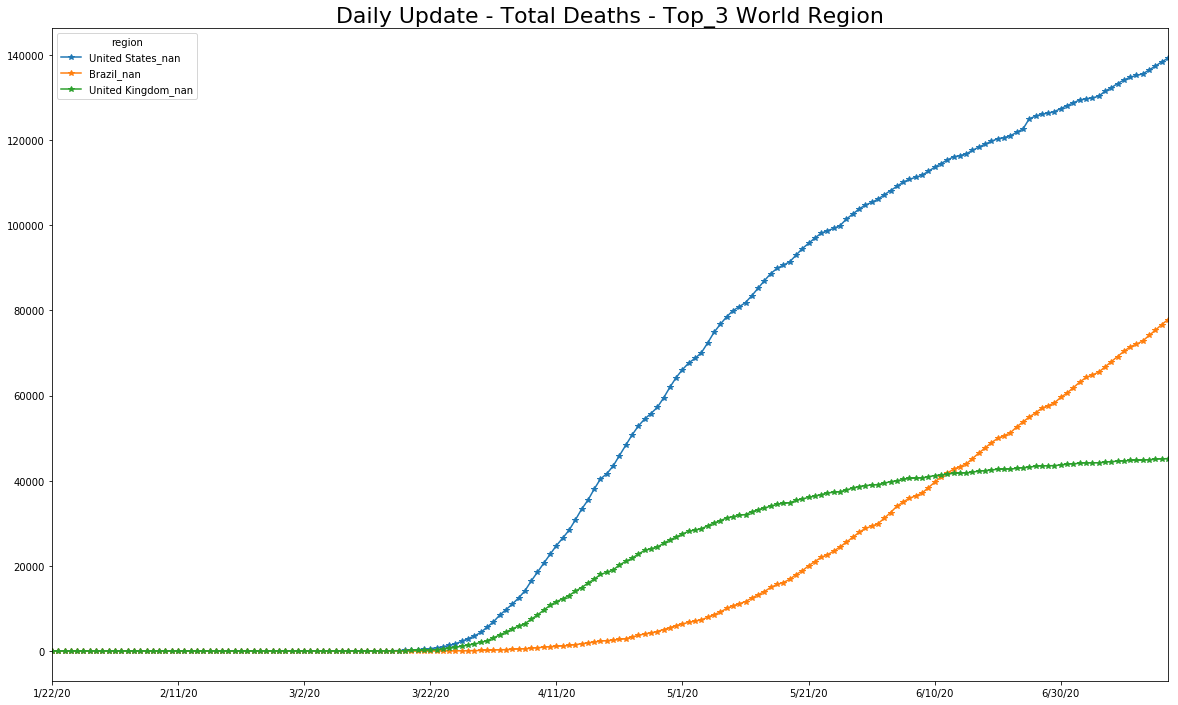

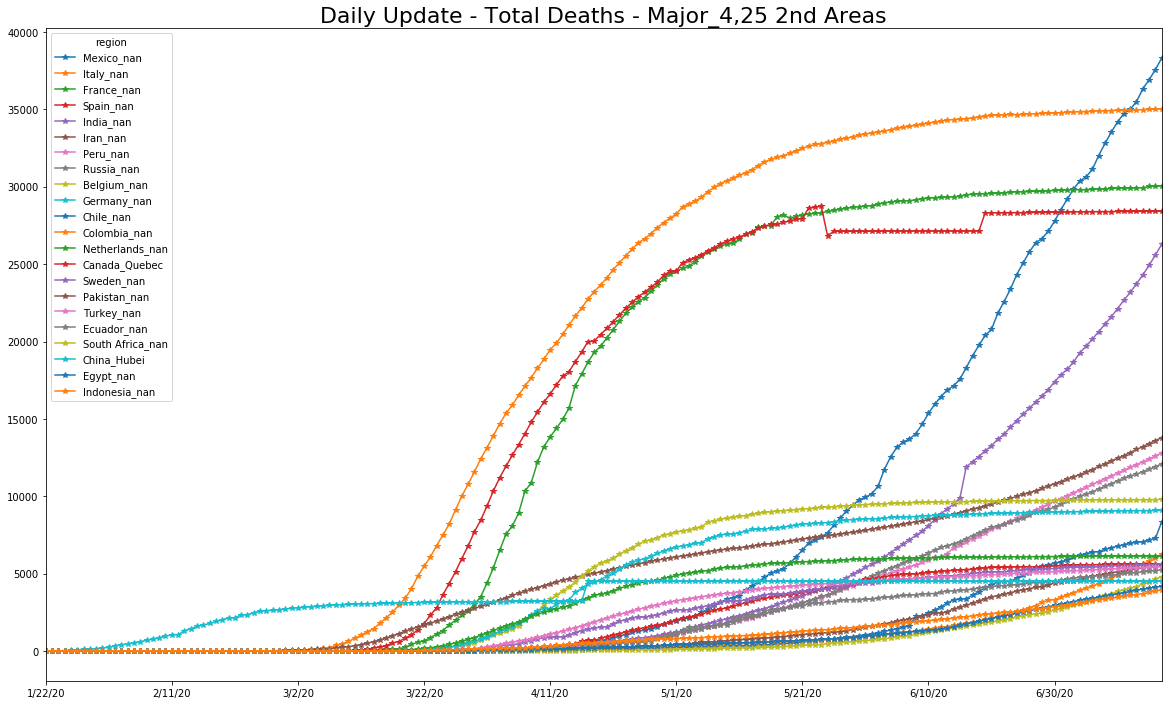

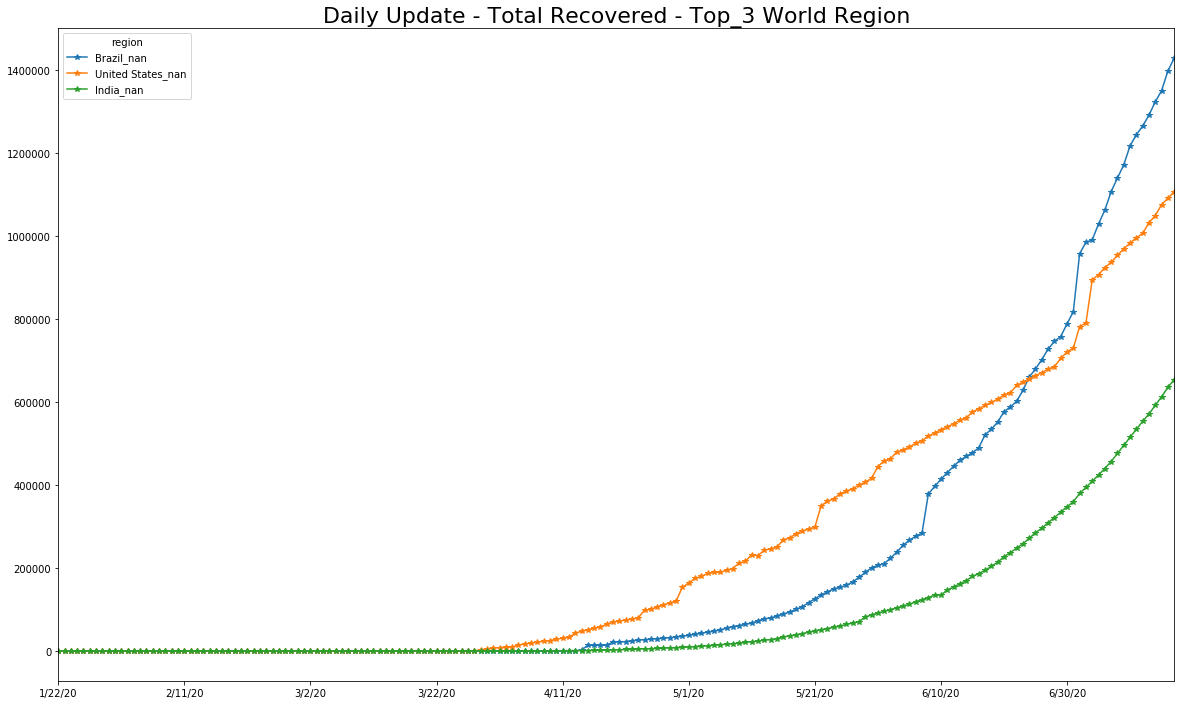

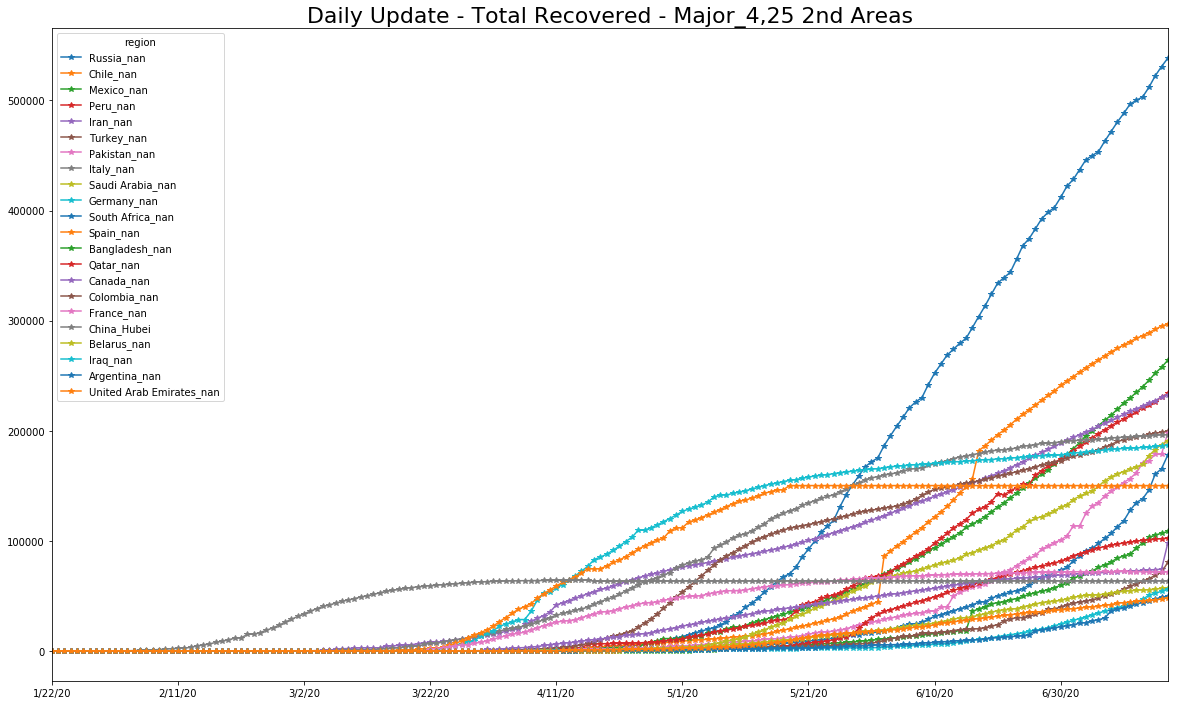

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/07/18


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
7/14/20            34740         3667        20216          861         541   
7/15/20            34994         3752        20770          862         576   
7/16/20            35070         3851        21355          877         607   
7/17/20            35229         3906        21948          880         638   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
7/14/20                       74         106910        32490   
7/15/20                       74         111146        33005   
7/16/20                       74         114783        33559   
7/17/20                       76         119301        34001   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
7/14/20                                     113                       3517   
7/15/20                                     113                       3527   
7/16/20                                     113                       3535   
7/17/20                                     113                       3550   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
7/14/20  ...            3431574          997           14085          10010   
7/15/20  ...            3498902         1009           14581          10428   
7/16/20  ...            3576157         1026           15066          10854   
7/17/20  ...            3647715         1037           15607          11191   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
7/14/20          373                    6764                  10       1516   
7/15/20          381                    7064                  10       1526   
7/16/20          381                    7412                  10       1552   
7/17/20          382                    7764                  10       1576   

region   Zambia_nan  Zimbabwe_nan  
7/14/20        1895          1064  
7/15/20        1895          1089  
7/16/20        1895          1362  
7/17/20        2810          1420  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
43922 2020-06-19     Zimbabwe_nan        479            62            76   
43923 2020-06-20     Zimbabwe_nan        479            16            88   
43924 2020-06-21     Zimbabwe_nan        489             0            78   
43925 2020-06-22     Zimbabwe_nan        512            10            26   
43926 2020-06-23     Zimbabwe_nan        525            23            33   
43927 2020-06-24     Zimbabwe_nan        530            13            46   
43928 2020-06-25     Zimbabwe_nan        551             5            41   
43929 2020-06-26     Zimbabwe_nan        561            21            39   
43930 2020-06-27     Zimbabwe_nan        567            10            36   
43931 2020-06-28     Zimbabwe_nan        567             6            37   
43932 2020-06-29     Zimbabwe_nan        574             0            16   
43933 2020-06-30     Zimbabwe_nan        591             7            13   
43934 2020-07-01     Zimbabwe_nan        605            17            24   
43935 2020-07-02     Zimbabwe_nan        617            14            38   
43936 2020-07-03     Zimbabwe_nan        625            12            43   
43937 2020-07-04     Zimbabwe_nan        698             8            34   
43938 2020-07-05     Zimbabwe_nan        716            73            93   
43939 2020-07-06     Zimbabwe_nan        734            18            99   
43940 2020-07-07     Zimbabwe_nan        787            18           109   
43941 2020-07-08     Zimbabwe_nan        885            53            89   
43942 2020-07-09     Zimbabwe_nan        885            98  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
43951 2020-07-18  Zimbabwe_nan          0            58           356   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
43951           478         104.259178         133.459586         150.744161   

       last_day  kalman_prediction  population  infected_rate  min  max  
43951      1420             1444.0    14862924   9.560702e-07  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000
ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
43949  2020-07-16  Zimbabwe_nan       1362            25           104   
43950  2020-07-17  Zimbabwe_nan       1420           273           328   
43951  2020-07-18  Zimbabwe_nan          0            58           356   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
43949           204         102.350564         110.559391         123.051977   
43950           477         125.069789         131.722437         153.899435   
43951           478         104.259178         133.459586         150.744161   

       confirmed_yesterday  confirmed_prediction  population  infected_rate  \
43949                 1089                1132.0    14862924   7.333684e-07   
43950                 1362                1307.0    14862924   9.170469e-07   
43951                 1420                1444.0    14862924   9.560702e-07   

       min  max  population_percentage : infected_rate confirmed  \
43949  NaN  NaN                                         0.000073   
43950  NaN  NaN                                         0.000092   
43951  NaN  NaN                                         0.000096   

       population_percentage : factor 9/10 infected_rate confirmed  \
43949                                           0.000733             
43950                                           0.000917             
43951                                           0.000956             

       delta : new_cases  delta : new_cases per 1M hab  
43949               43.0                      2.893105  
43950              -55.0                     -3.700483  
43951               24.0                      1.614756

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  8.441229e+10  290537.926744  27698.766871


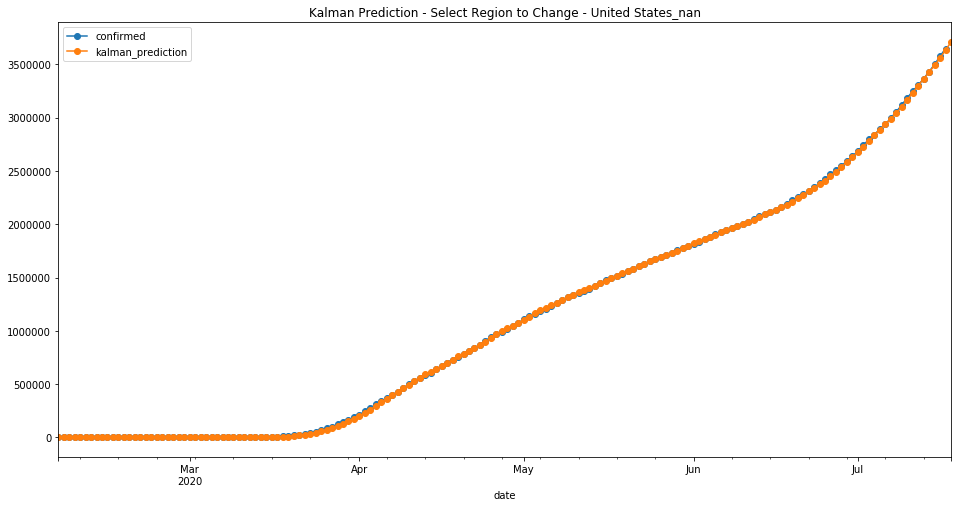

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  3.587106e+09  59892.453205  5378.760736


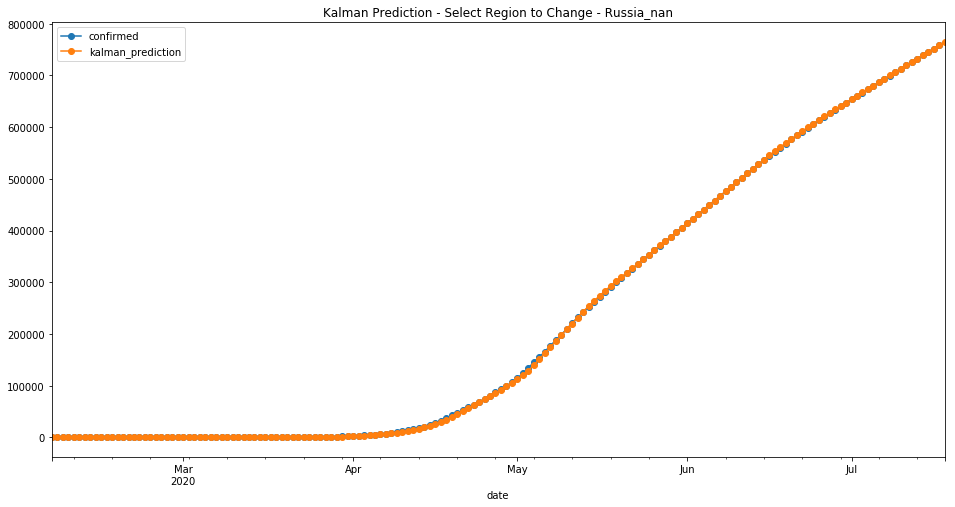

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  2.661547e+10  163142.482703  16883.208589


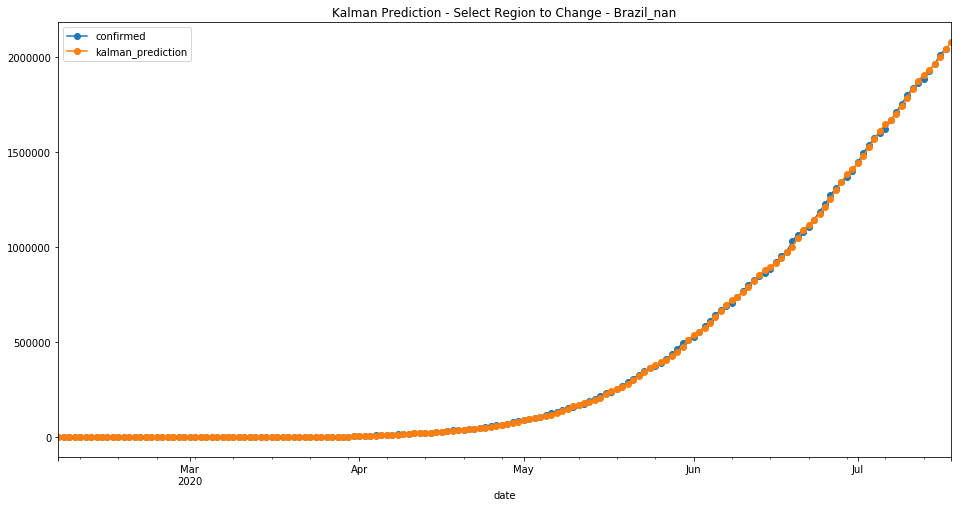

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  5.310361e+08  23044.220195  2364.116564


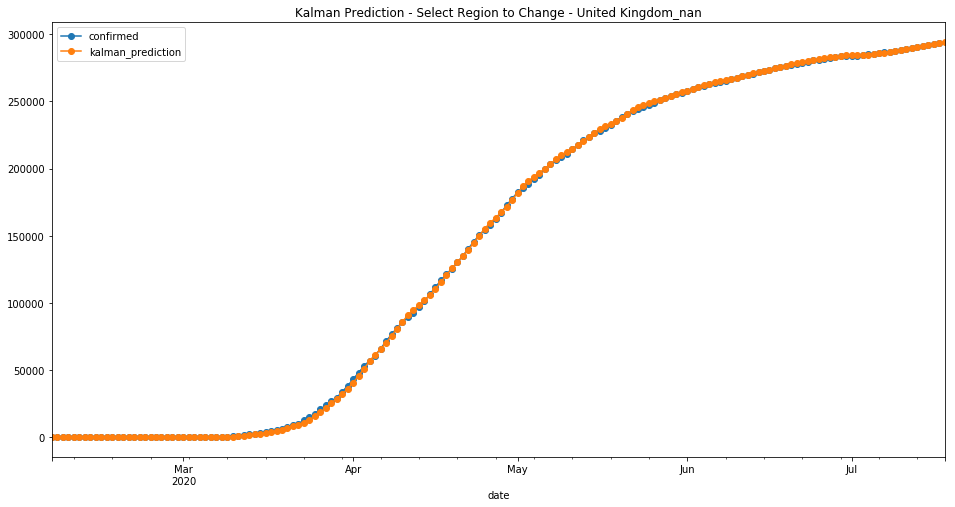

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptf17xyla
  JVM stdout: /tmp/tmptf17xyla/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmptf17xyla/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 8 months and 21 days !!!
H2O cluster name:           H2O_from_python_unknownUser_jane0z
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-07-10
last_train_date= 2020-07-17
first_bootstrap_date= 2020-07-09
boost_bootstrap_date= 2020-07-14
first_test_date= 2020-07-08
last_test_date= 2020-07-18
first_valid_date= 2020-07-16


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   33854.0      33908 2020-07-09  Afghanistan_nan
1   34217.0      34194 2020-07-10  Afghanistan_nan
2   34478.0      34366 2020-07-11  Afghanistan_nan
3   34586.0      34451 2020-07-12  Afghanistan_nan
4   34635.0      34455 2020-07-13  Afghanistan_nan
5   34605.0      34740 2020-07-14  Afghanistan_nan
6   35003.0      34994 2020-07-15  Afghanistan_nan
7   35226.0      35070 2020-07-16  Afghanistan_nan
8   35192.0      35229 2020-07-17  Afghanistan_nan
9   35383.0          0 2020-07-18  Afghanistan_nan
10   3178.0       3188 2020-07-09      Albania_nan
11   3265.0       3278 2020-07-10      Albania_nan
12   3356.0       3371 2020-07-11      Albania_nan
13   3451.0       3454 2020-07-12      Albania_nan
14   3531.0       3571 2020-07-13      Albania_nan
15   3665.0       3667 2020-07-14      Albania_nan
16   3754.0       3752 2020-07-15      Albania_nan
17   3837.0       3851 2020-07-16      Albania_nan
18   3946.0       3906 2020-07-17      Albania_nan
19   3983.0          0 2020-07-18      Albania_nan
20  17818.0      17808 2020-07-09      Algeria_nan
21  18286.0      18242 2020-07-10      Algeria_nan
22  18718.0      18712 2020-07-11      Algeria_nan
23  19208.0      19195 2020-07-12      Algeria_nan
24  19699.0      19689 2020-07-13      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  25126.0      25113 2020-07-14  Azerbaijan_nan
176  25674.0      25672 2020-07-15  Azerbaijan_nan
177  26237.0      26165 2020-07-16  Azerbaijan_nan
178  26700.0      26636 2020-07-17  Azerbaijan_nan
179  27162.0          0 2020-07-18  Azerbaijan_nan
180    109.0        107 2020-07-09     Bahamas_nan
181    110.0        108 2020-07-10     Bahamas_nan
182    111.0        111 2020-07-11     Bahamas_nan
183    115.0        111 2020-07-12     Bahamas_nan
184    114.0        113 2020-07-13     Bahamas_nan
185    117.0        116 2020-07-14     Bahamas_nan
186    121.0        119 2020-07-15     Bahamas_nan
187    124.0        124 2020-07-16     Bahamas_nan
188    130.0        129 2020-07-17     Bahamas_nan
189    136.0          0 2020-07-18     Bahamas_nan
190  31329.0      31528 2020-07-09     Bahrain_nan
191  31922.0      32039 2020-07-10     Bahrain_nan
192  32388.0      32470 2020-07-11     Bahrain_nan
193  32802.0      32941 2020-07-12     Bahrain_nan
194  33296.0      33476 2020-07-13     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  64450.0      64411 2020-07-09  Belarus_nan
221  64617.0      64604 2020-07-10  Belarus_nan
222  64798.0      64767 2020-07-11  Belarus_nan
223  64939.0      64932 2020-07-12  Belarus_nan
224  65091.0      65114 2020-07-13  Belarus_nan
225  65271.0      65269 2020-07-14  Belarus_nan
226  65409.0      65443 2020-07-15  Belarus_nan
227  65583.0      65623 2020-07-16  Belarus_nan
228  65764.0      65782 2020-07-17  Belarus_nan
229  65909.0          0 2020-07-18  Belarus_nan
230  62196.0      62210 2020-07-09  Belgium_nan
231  62285.0      62357 2020-07-10  Belgium_nan
232  62442.0      62469 2020-07-11  Belgium_nan
233  62535.0      62707 2020-07-12  Belgium_nan
234  62817.0      62707 2020-07-13  Belgium_nan
235  62730.0      62781 2020-07-14  Belgium_nan
236  62850.0      62872 2020-07-15  Belgium_nan
237  62966.0      63238 2020-07-16  Belgium_nan
238  63441.0      63499 2020-07-17  Belgium_nan
239  63653.0          0 2020-07-18  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  16692698.06824653
# MSE on the validation data =  172878510803.44522
# R^2 on the training data =  0.9998509675215842
# R^2 on the validation data =  0.45064413826115335


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1595053123383_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 16692698.06824653
RMSE: 4085.6698432749713
MAE: 666.8771206361909
RMSLE: 0.33933562123616096
Mean Residual Deviance: 16692698.06824653

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 172878510803.44522
RMSE: 415786.6169123836
MAE: 99349.5983893208
RMSLE: 6.3612724732578565
Mean Residual Deviance: 172878510803.44522
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-07-18 06:18:50  0.071 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-07-18 06:18:50  0.451 sec   1.0                12288.499024001949  2354.2642263373978  151007208.26289687   426263.5819752232   101384.31357993736  181700641318.34784
     2020-07-18 06:18:50  0.590 sec   2.0                9053.993733689711   1864.5359920734513  81974802.52969256    409063.56556124025  99460.68523785015   167333000669.67508
     2020-07-18 06:18:50  0.681 sec   3.0                8665.98893612       1797.8573511119855  75099364.24095426    407524.72332820034  97658.64939280102   166076400123.72626
     2020-07-18 06:18:51  0.767 sec   4.0                11518.47405162153   1837.847911044955   132675244.47787851   409920.9078435846   98181.35651954445   168035150687.30856
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-07-18 06:18:58  8.135 sec   131.0              4769.421152977673   768.45632565311     22747378.134470876   416843.9455627111   99552.73524961741   173758874952.28845
     2020-07-18 06:19:02  12.157 sec  235.0              4639.072774908566   732.115665826562    21520996.210897863   416890.4257649422   99481.18646795383   173797627094.47476
     2020-07-18 06:19:06  16.178 sec  339.0              4291.034770553418   686.4430367687353   18412979.40209842    416758.1585116968   99578.43525077909   173687362686.06058
     2020-07-18 06:19:10  20.201 sec  447.0              4157.96455725414    673.1050572496706   17288669.25938162    415836.54007655225  99372.50379328466   172920028062.83804
     2020-07-18 06:19:12  22.349 sec  500.0              4085.6698432749713  666.8771206361909   16692698.06824653    415786.6169123836   99349.5983893208    172878510803.44522


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  1.20769e+17            1                    0.371952
last_day           9.00392e+16            0.745548             0.277308
7_day_change       4.77938e+16            0.395745             0.147198
3_day_change       3.00356e+16            0.248703             0.0925055
1_day_change       2.01171e+16            0.166575             0.0619579
region             6.62444e+15            0.0548521            0.0204023
infected_rate      6.30111e+15            0.0521748            0.0194065
max                6.76196e+14            0.00559908           0.00208259
7_day_change_rate  6.64444e+14            0.00550177           0.00204639
min                6.1575e+14             0.00509857           0.00189642
1_day_change_rate  5.30651e+14            0.00439393           0.00163433
3_day_change_rate  5.22955e+14            0.0043302            0.00161063

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.207691e+17           1.000000    0.371952
1            last_day         9.003920e+16           0.745548    0.277308
2        7_day_change         4.779379e+16           0.395745    0.147198
3        3_day_change         3.003563e+16           0.248703    0.092505
4        1_day_change         2.011712e+16           0.166575    0.061958
5              region         6.624444e+15           0.054852    0.020402
6       infected_rate         6.301107e+15           0.052175    0.019407
7                 max         6.761960e+14           0.005599    0.002083
8   7_day_change_rate         6.644441e+14           0.005502    0.002046
9                 min         6.157503e+14           0.005099    0.001896
10  1_day_change_rate         5.306515e+14           0.004394    0.001634
11  3_day_change_rate         5.229546e+14           0.004330    0.001611

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


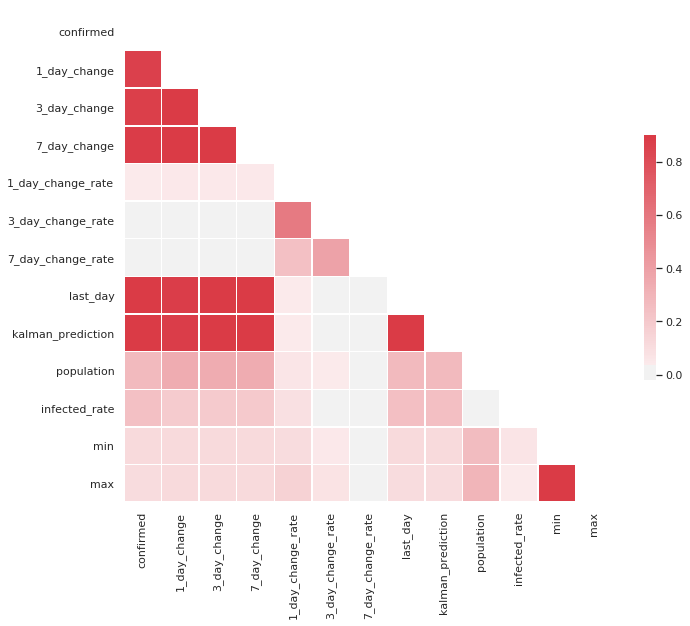

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.867737
3_day_change         0.877278
7_day_change         0.887663
1_day_change_rate    0.040672
3_day_change_rate    0.010145
7_day_change_rate   -0.008790
last_day             0.981293
kalman_prediction    0.981326
population           0.270272
infected_rate        0.243225
min                  0.118107
max                  0.110726
Name: confirmed, dtype: float64


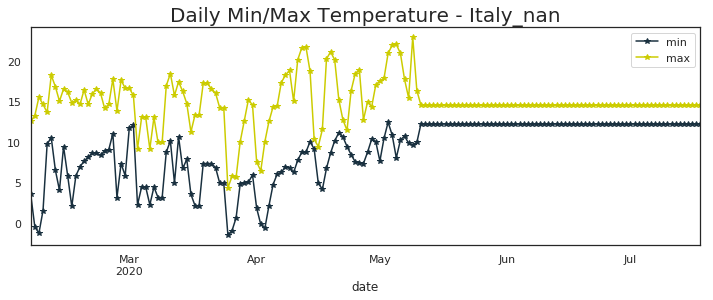

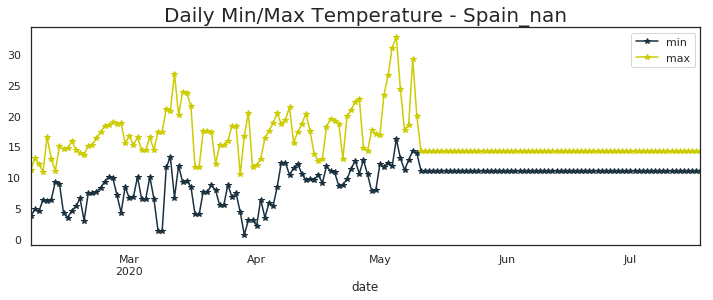

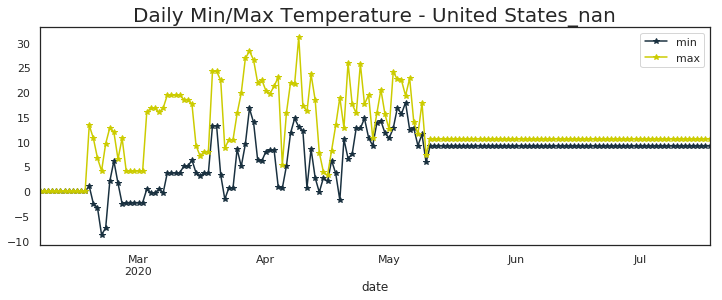

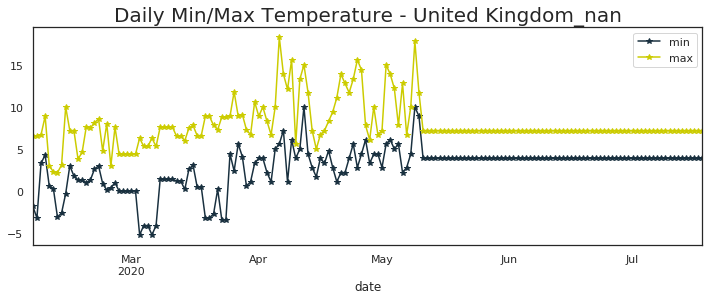

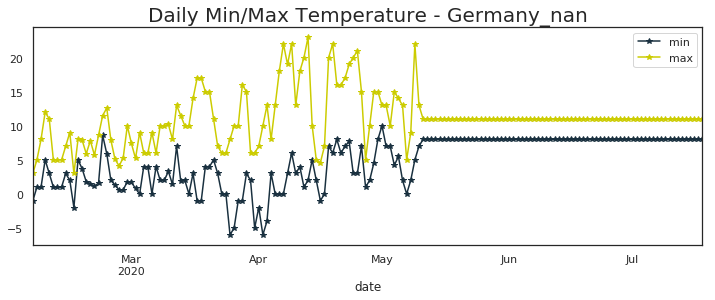

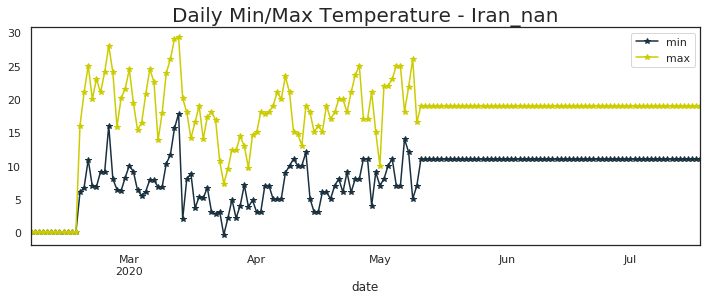

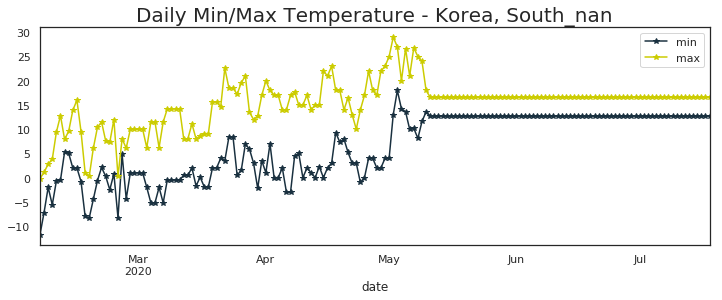

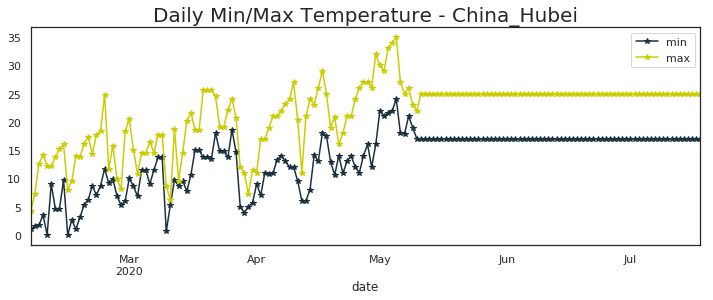

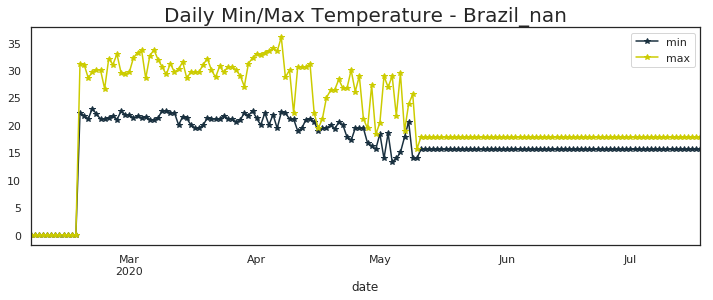

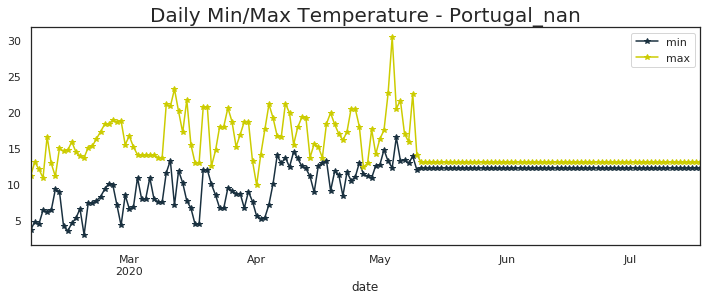

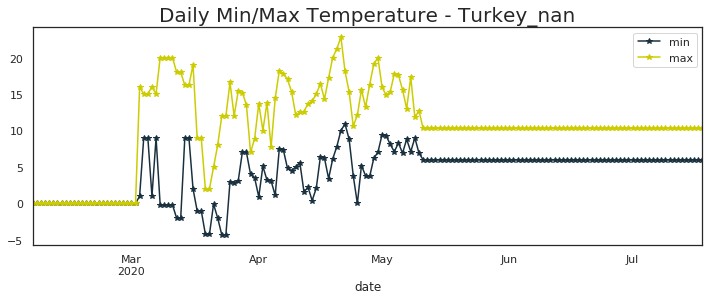

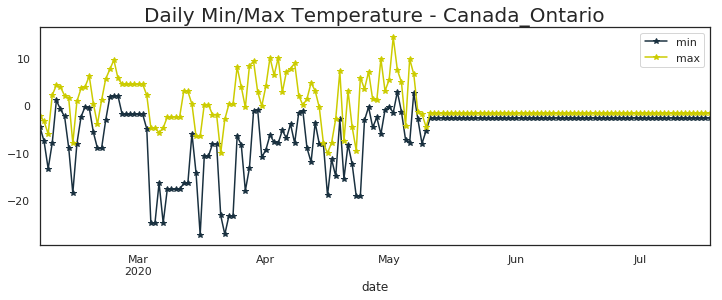

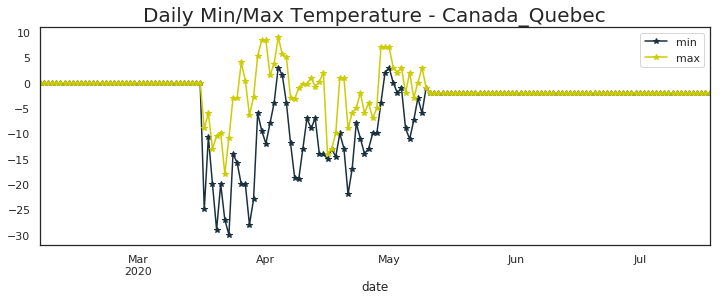

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                               min   max
region                                  
United States_nan             17.9  31.1
Brazil_nan                    23.0  36.0
India_nan                     30.0  43.0
Russia_nan                    13.0  30.0
Peru_nan                       0.0   0.0
South Africa_nan               0.0   0.0
Mexico_nan                     0.0   0.0
Chile_nan                      0.0   0.0
United Kingdom_nan            10.0  18.3
Iran_nan                      17.8  29.3
Pakistan_nan                  16.0  28.0
Spain_nan                     16.2  32.7
Saudi Arabia_nan               0.0   0.0
Italy_nan                     12.4  22.9
Turkey_nan                    10.9  22.8
Germany_nan                   10.0  23.0
France_nan                    14.2  23.8
Bangladesh_nan                 0.0   0.0
Colombia_nan                   0.0   0.0
Argentina_nan                  0.0   0.0
Qatar_nan                      0.0   0.0
Iraq_nan             

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

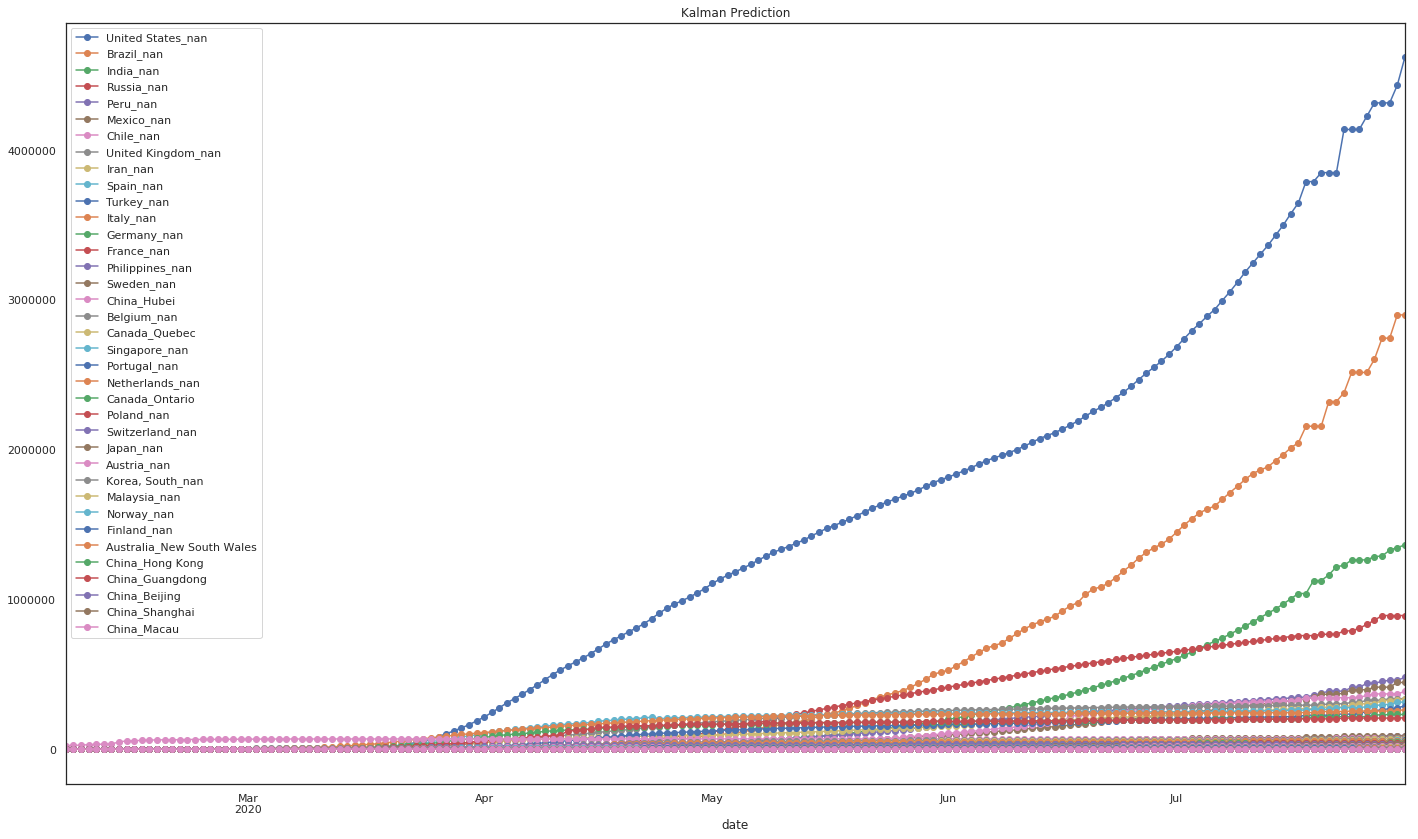

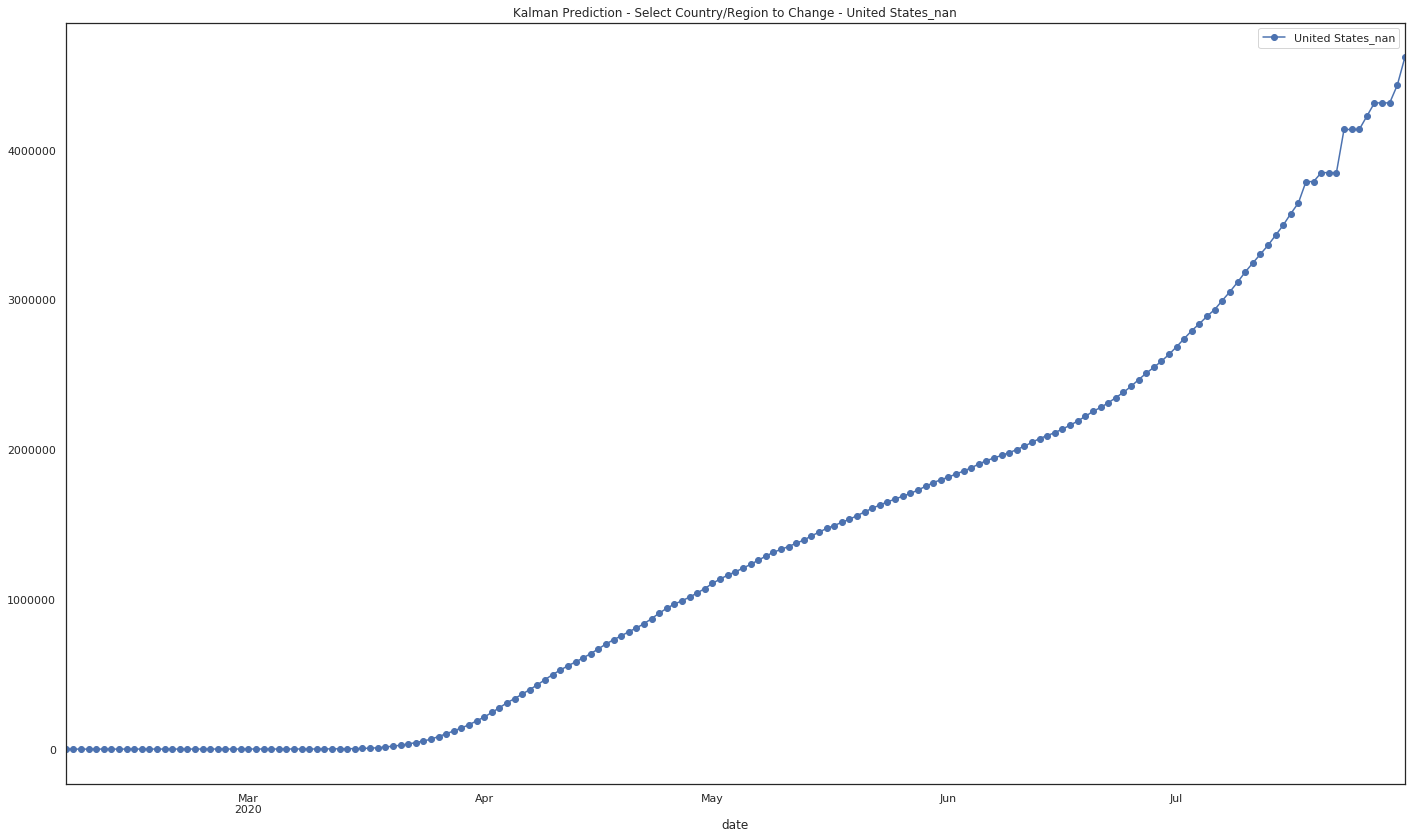

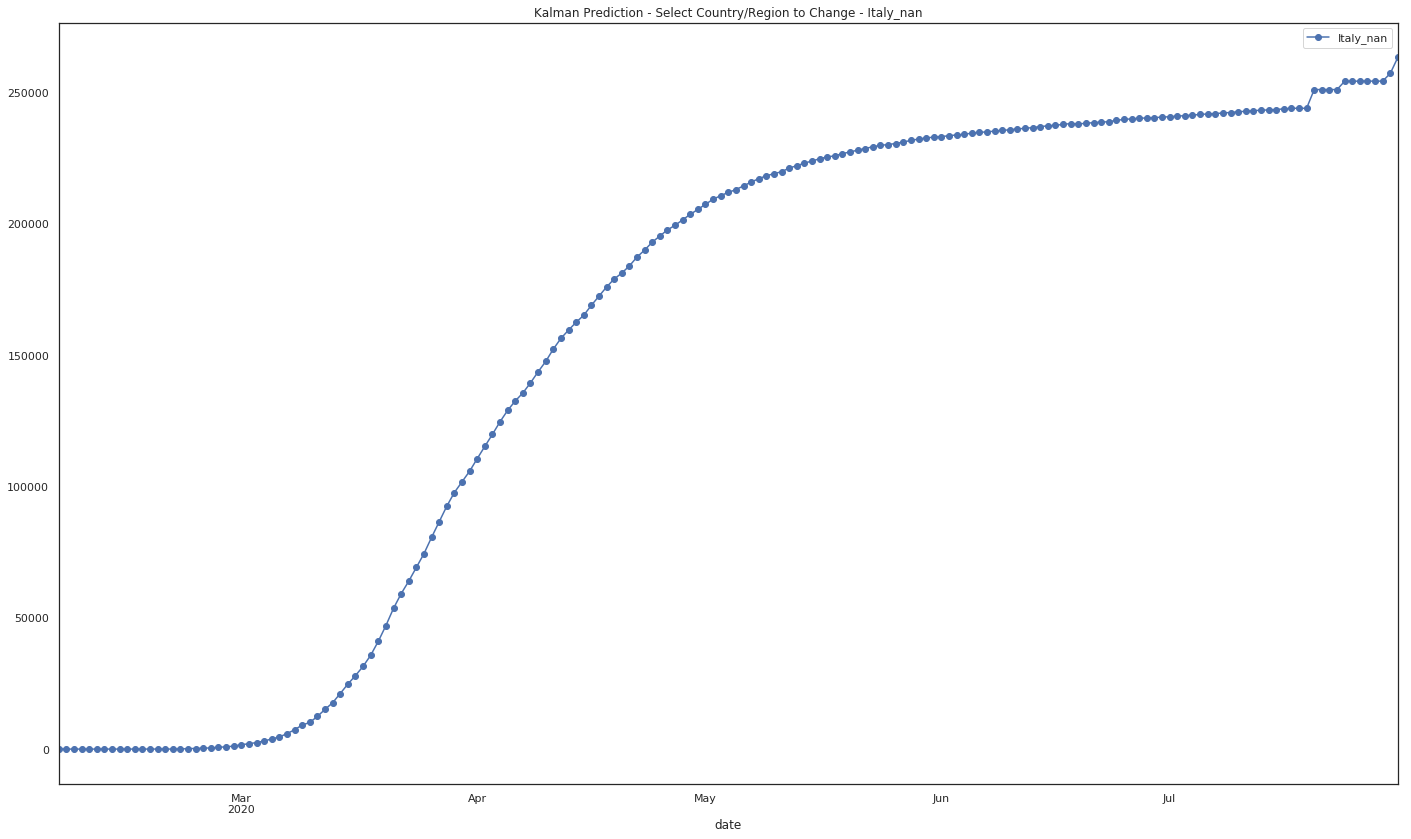

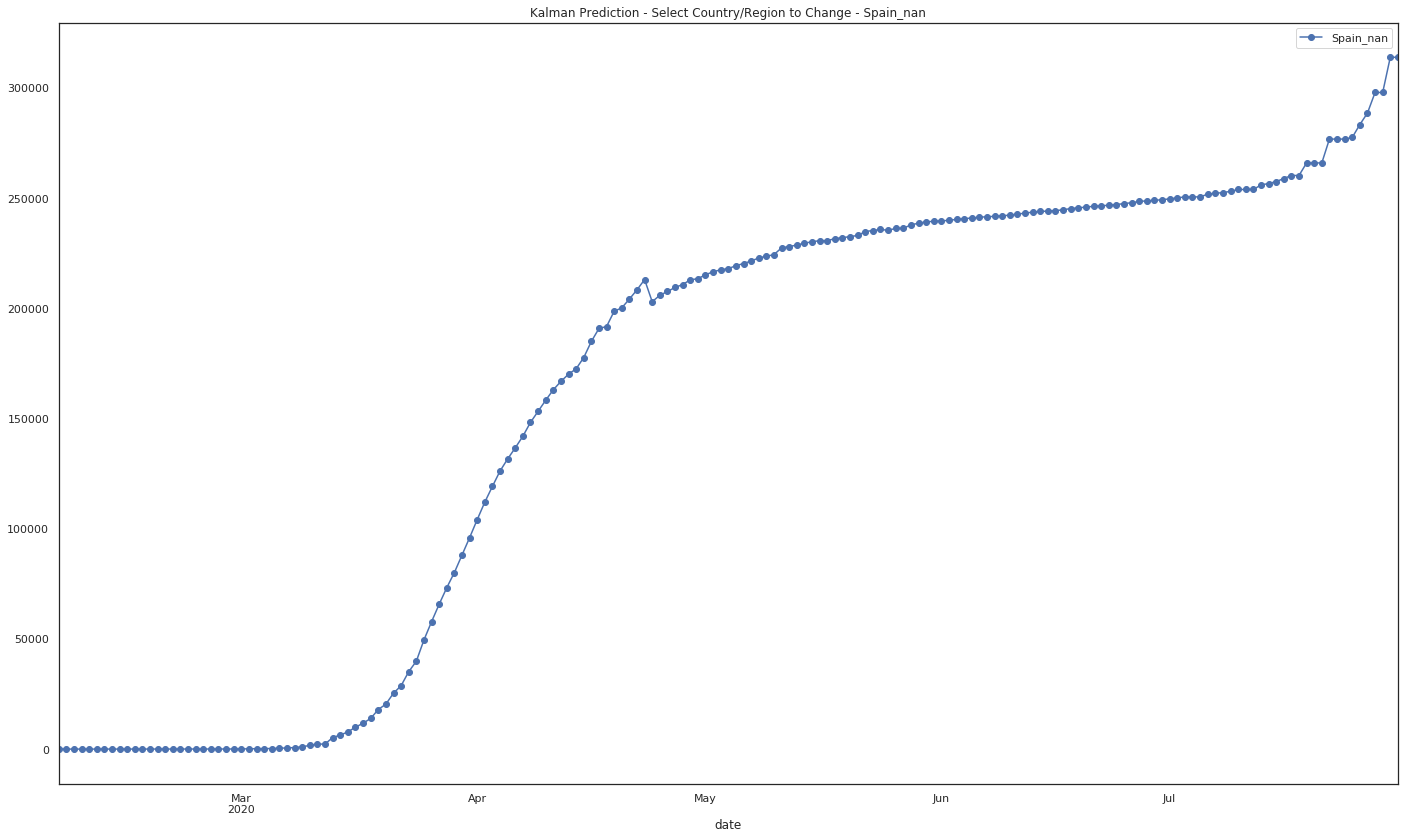

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


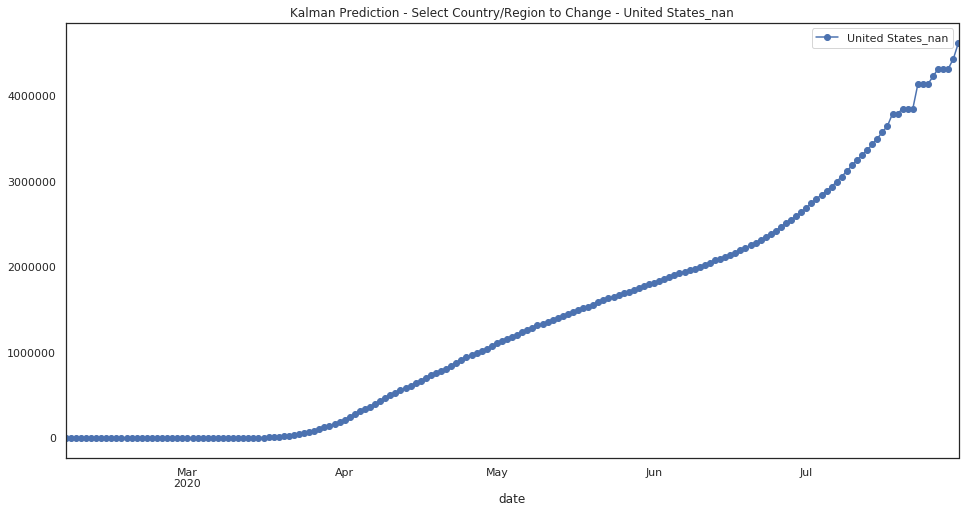

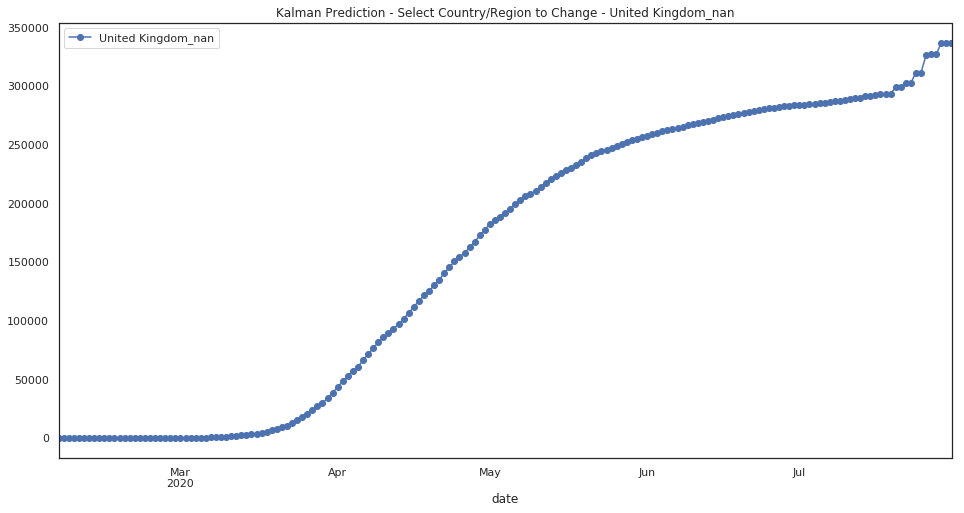

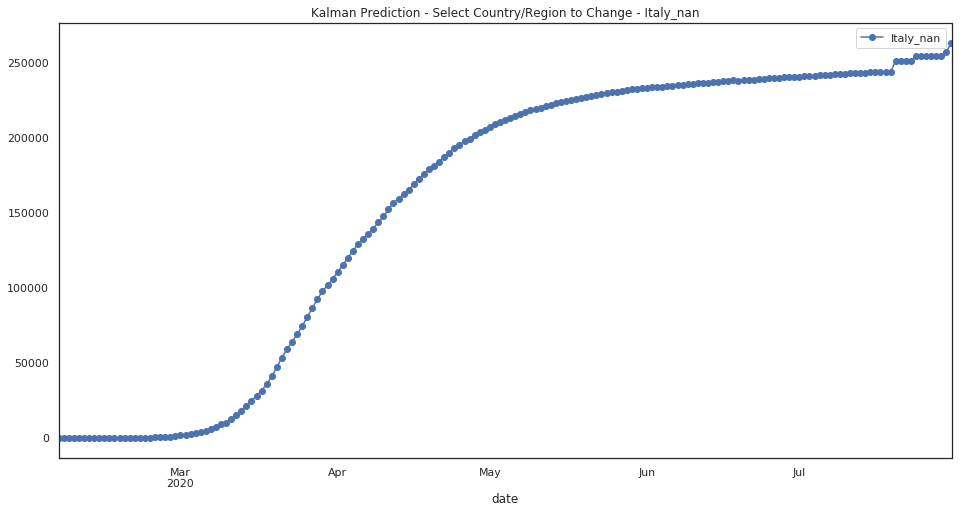

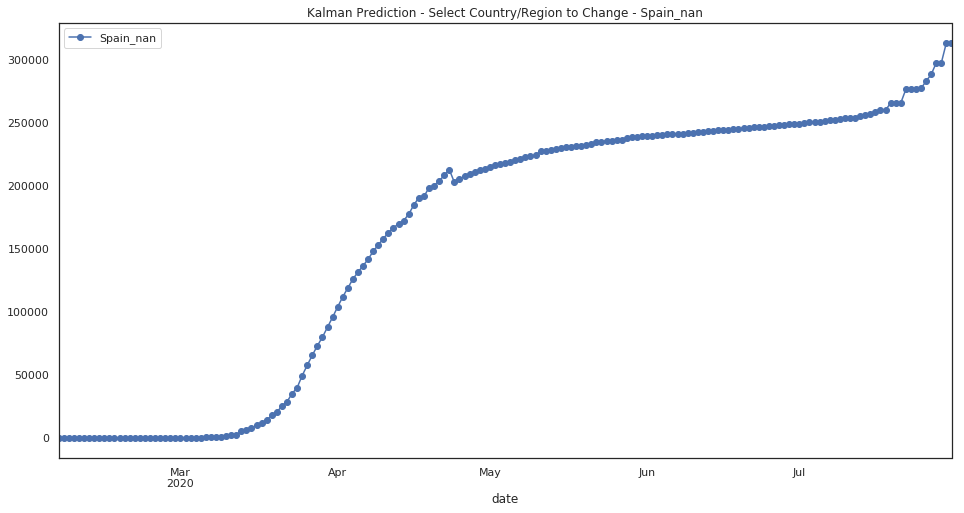

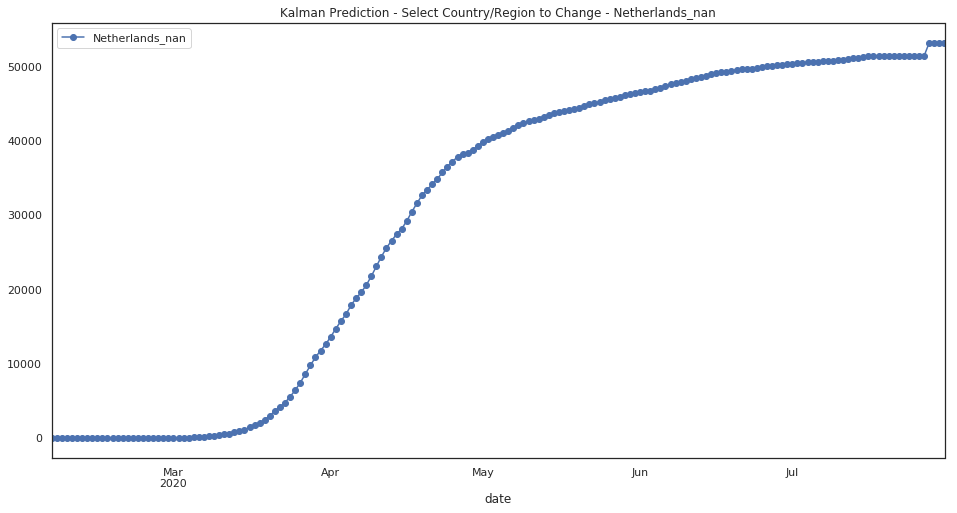

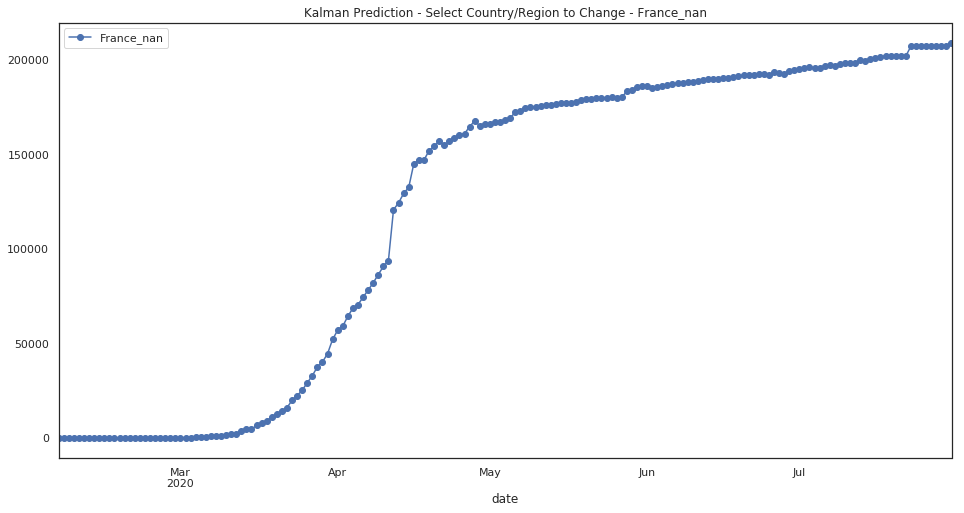

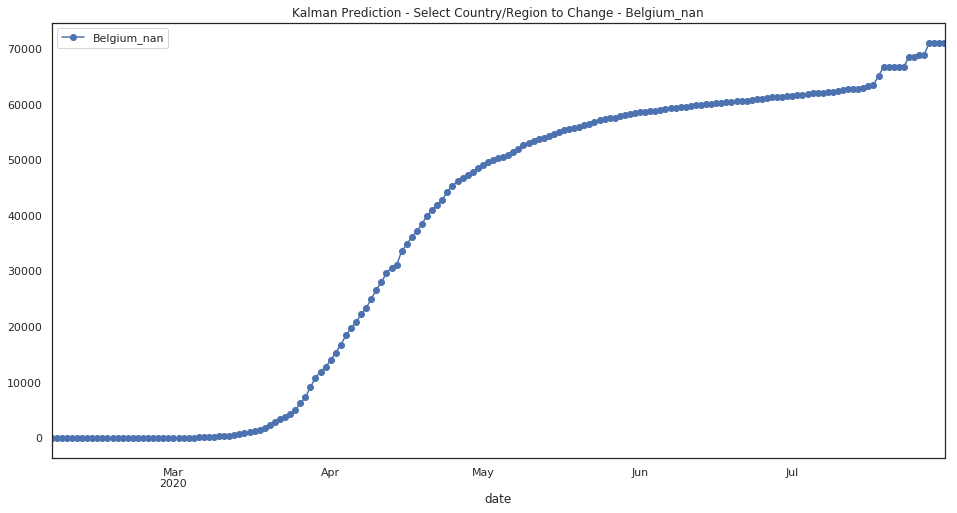

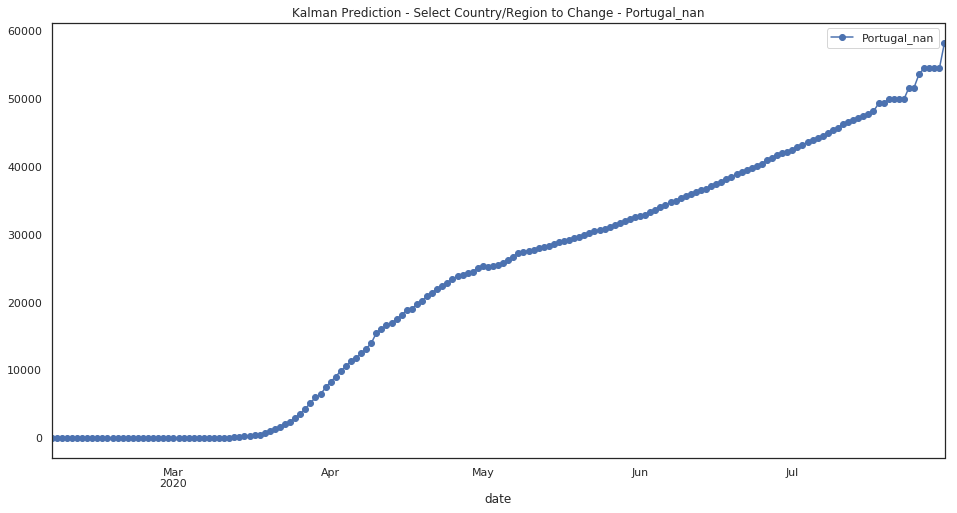

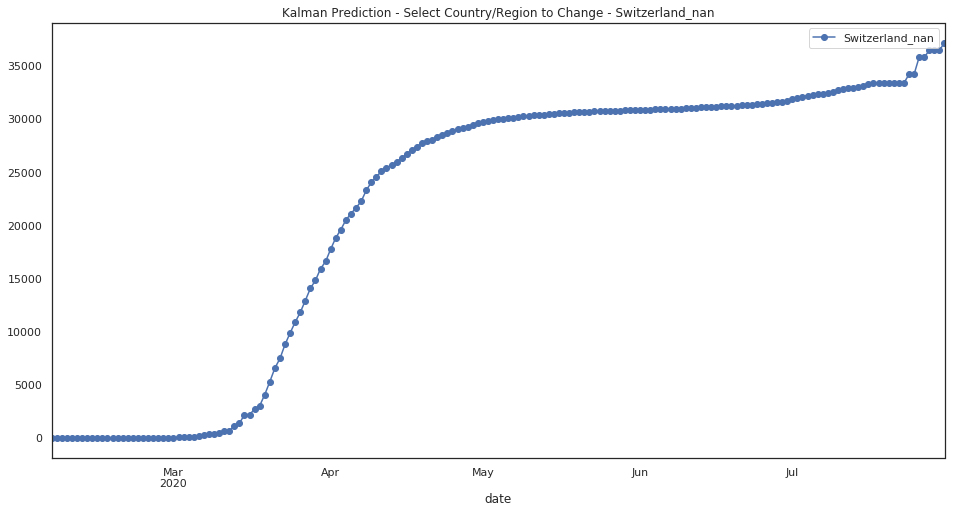

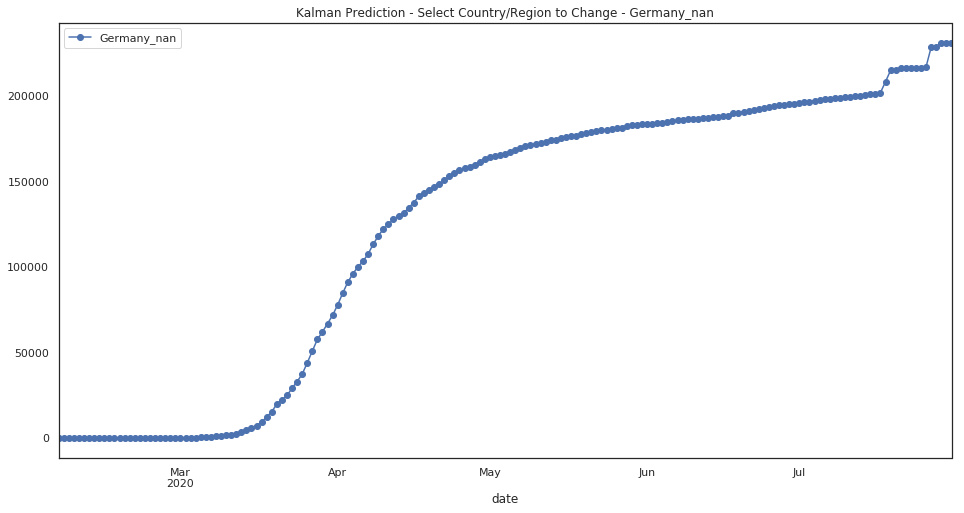

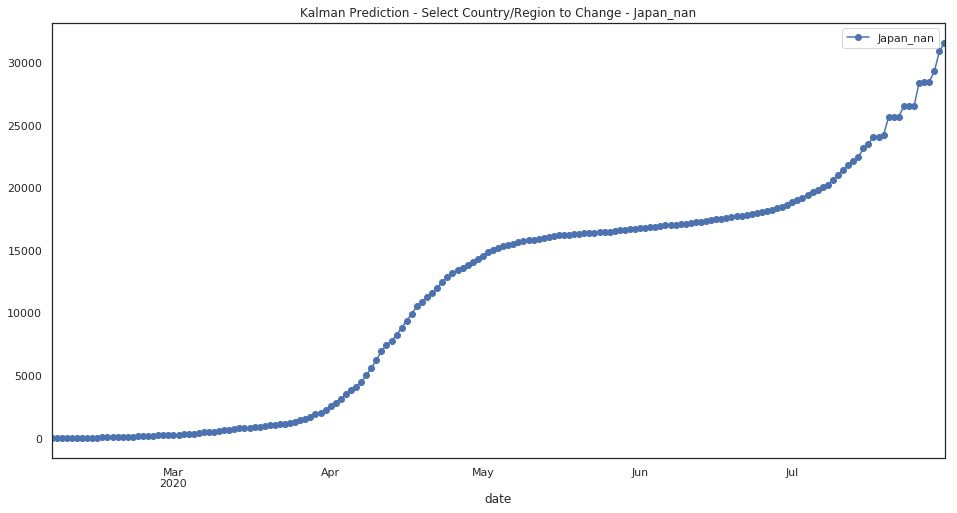

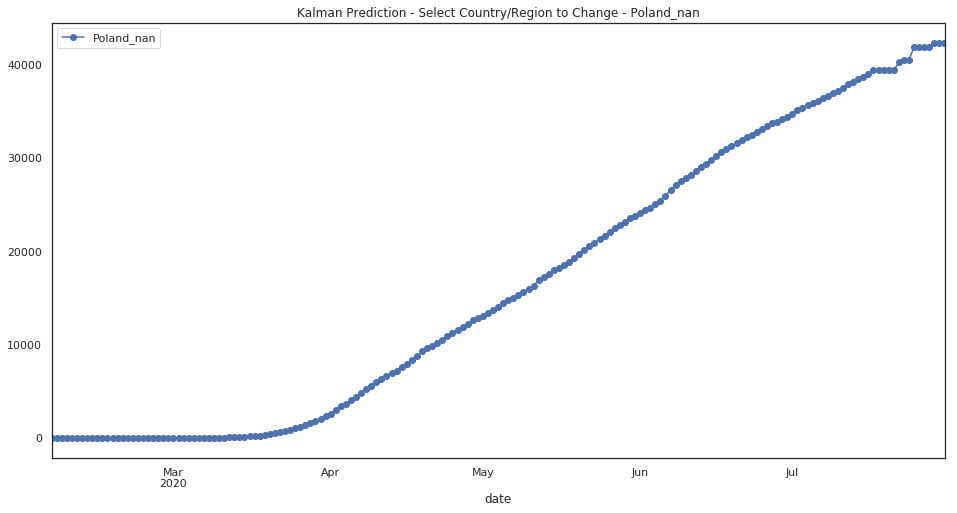

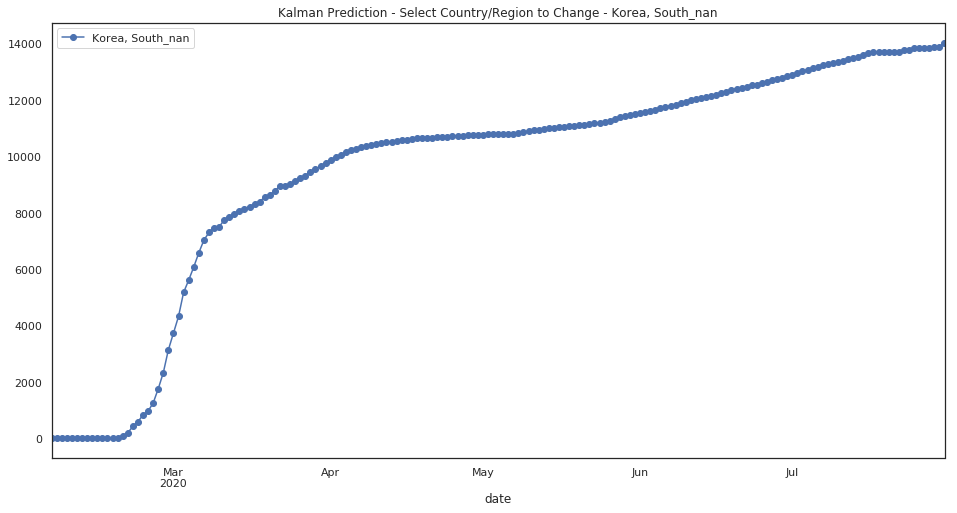

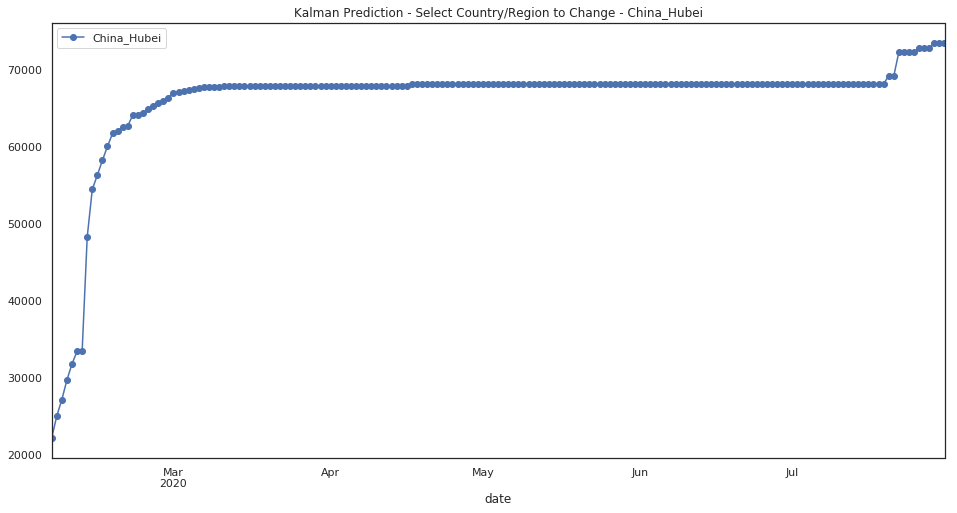

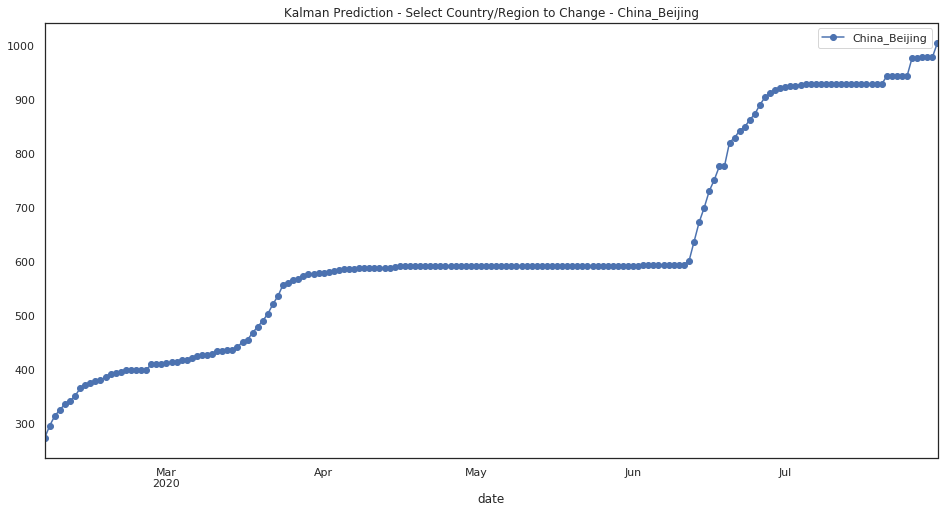

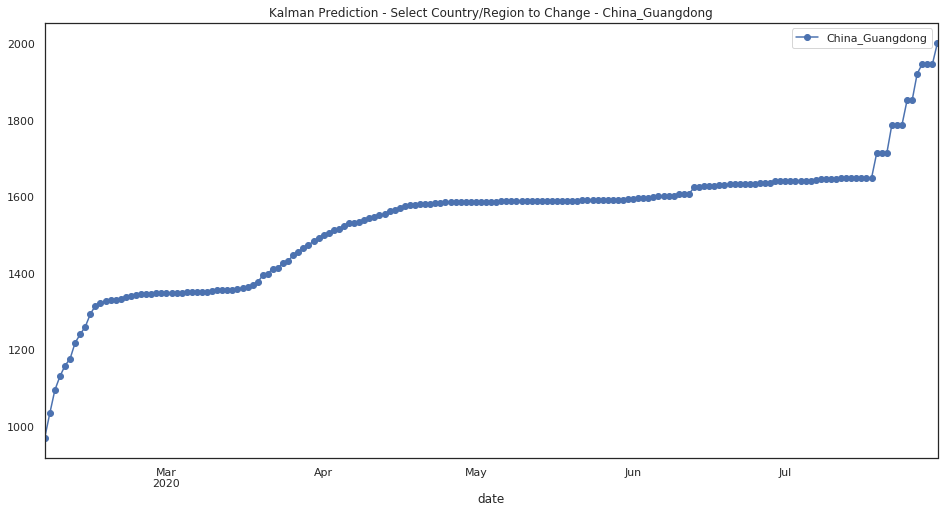

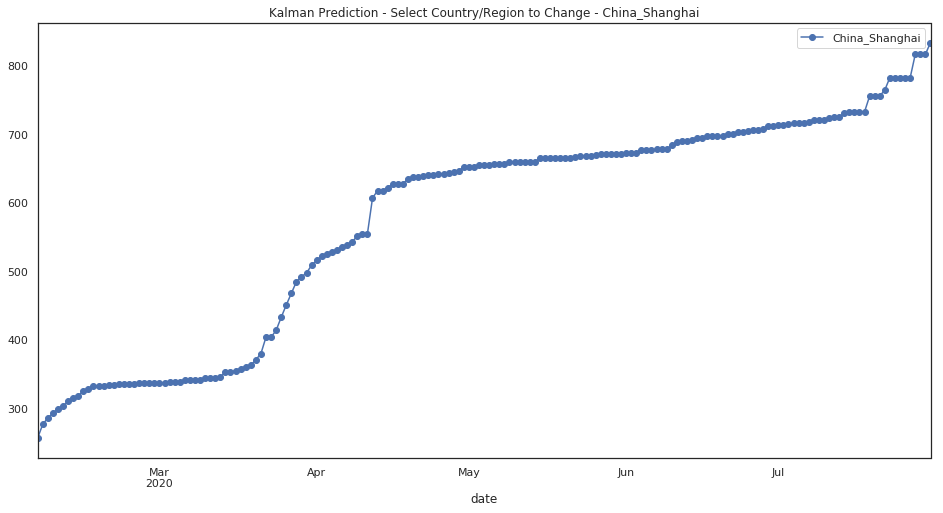

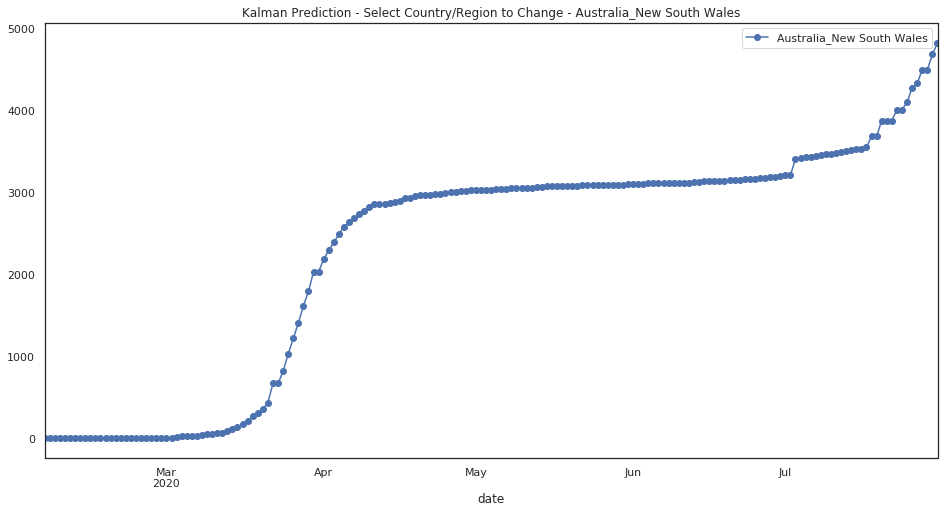

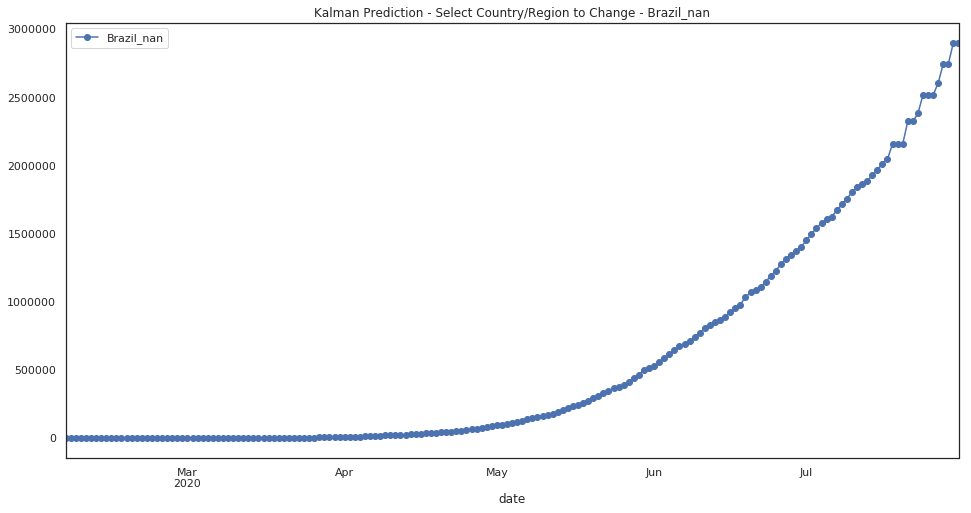

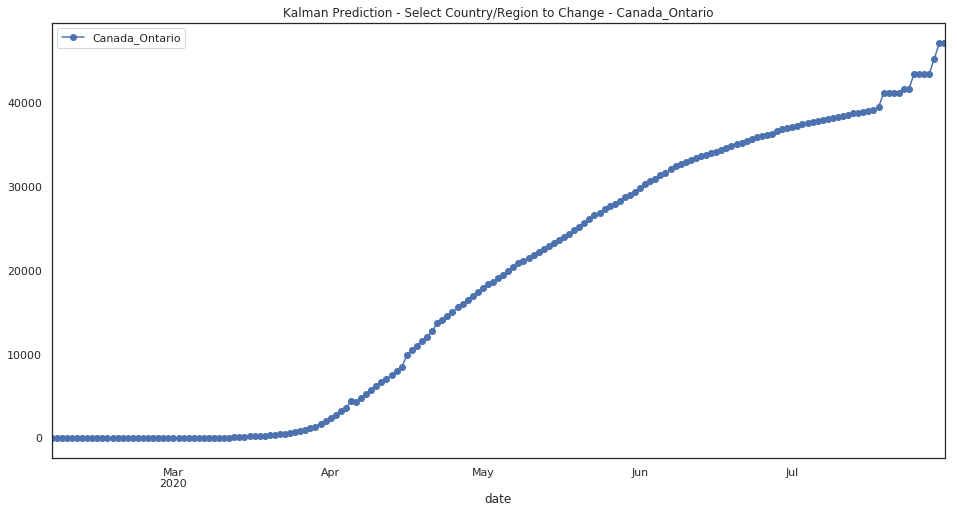

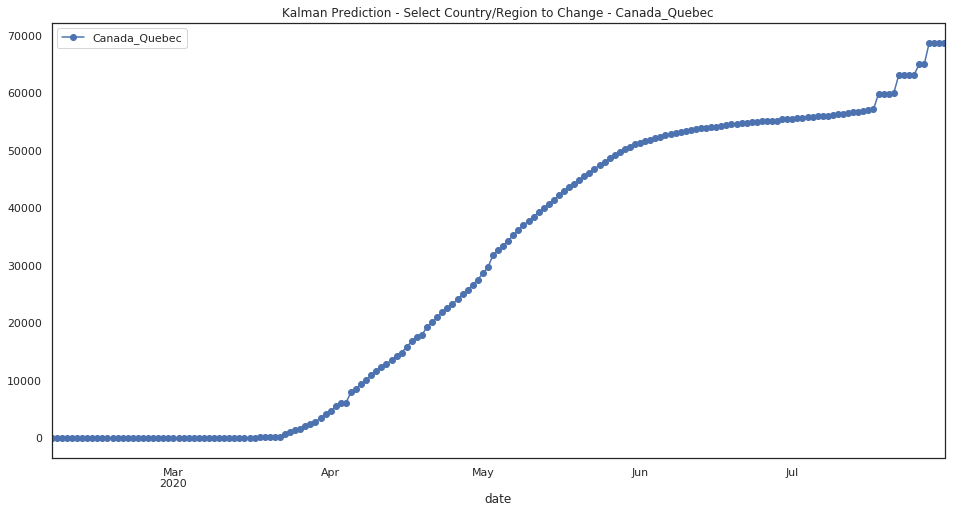

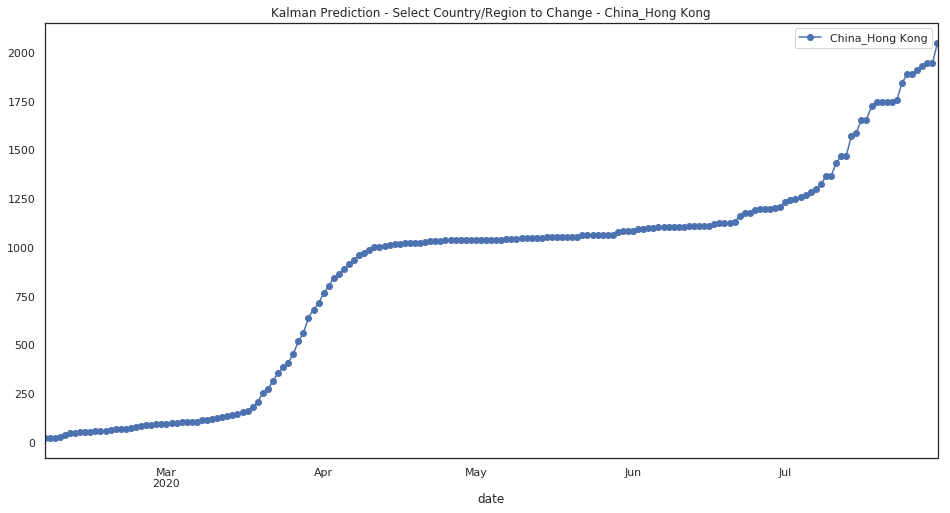

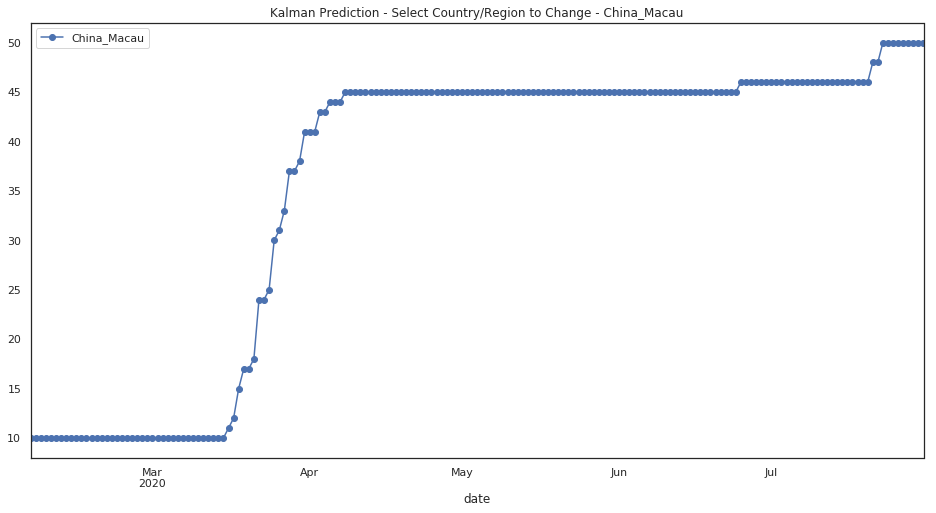

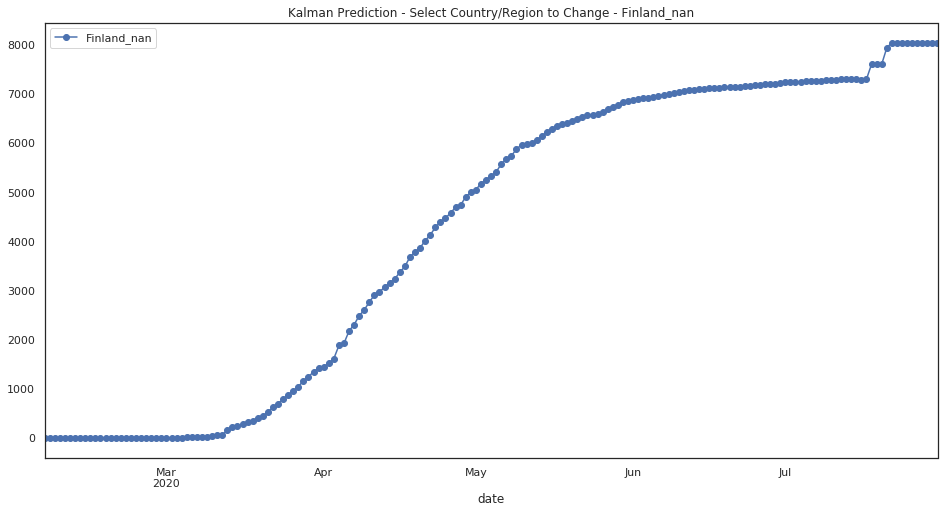

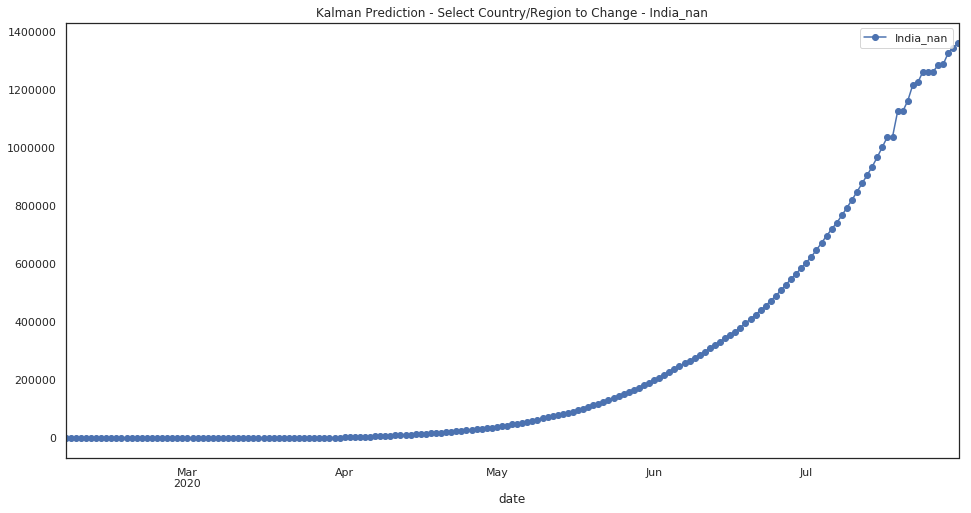

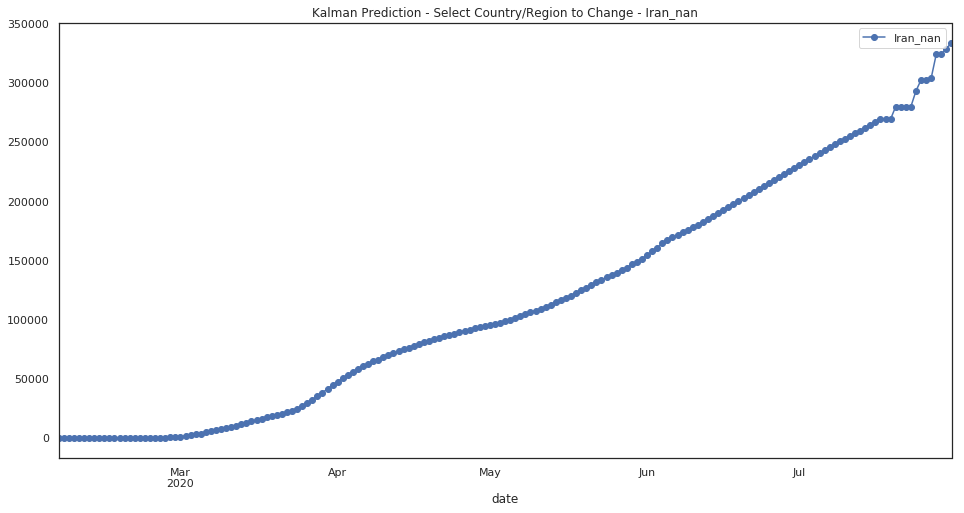

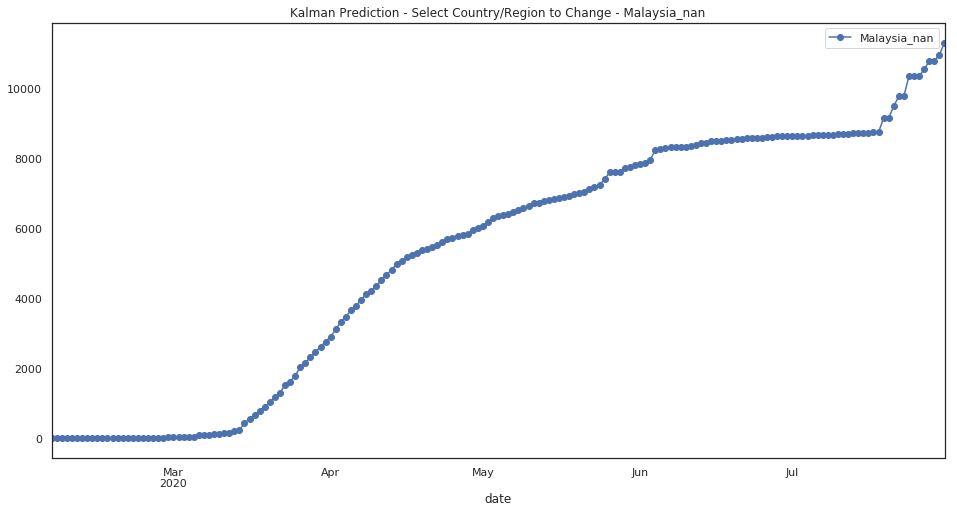

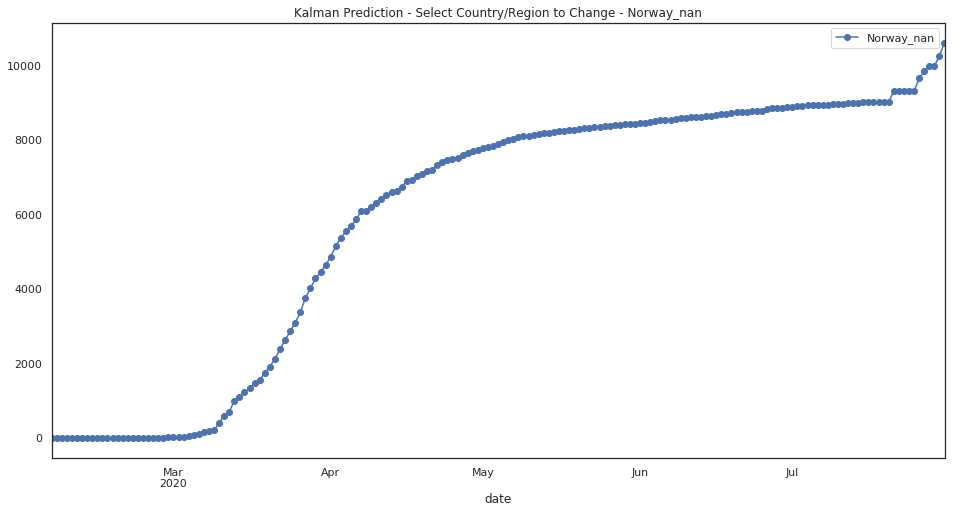

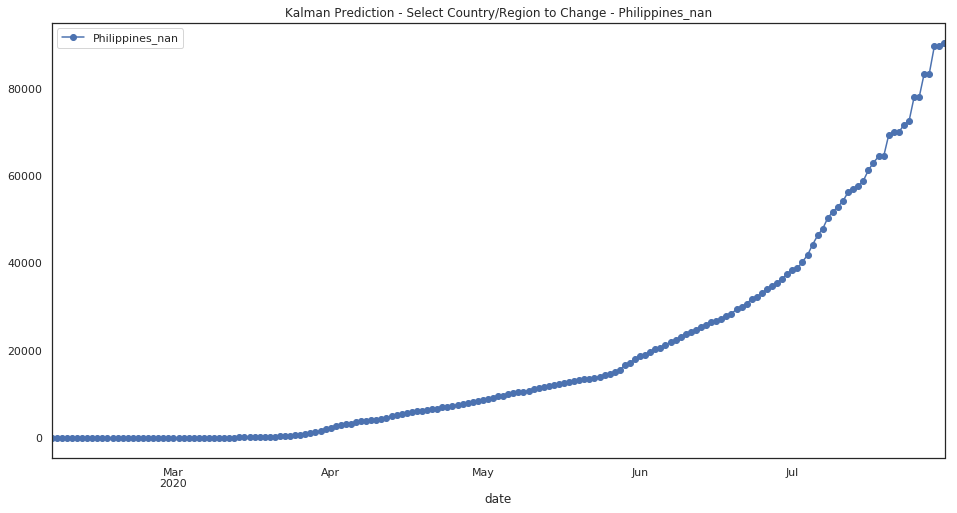

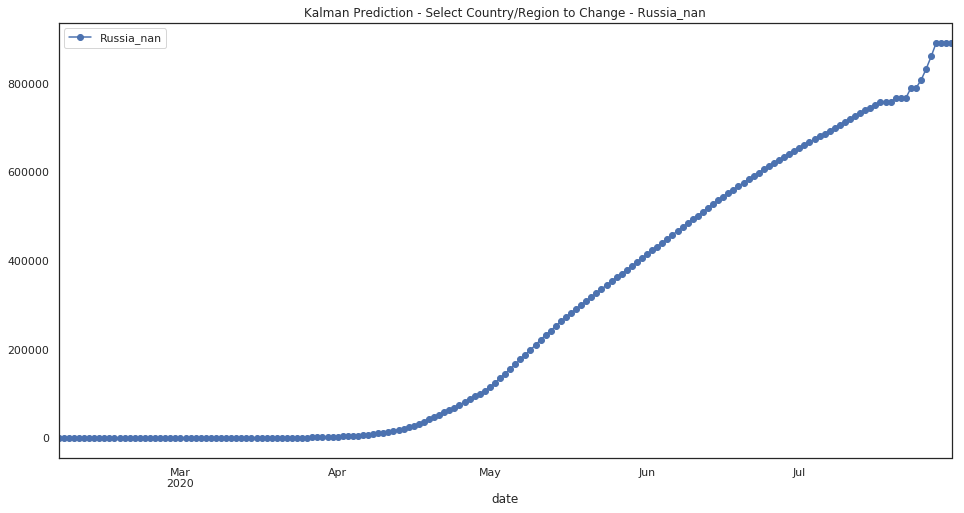

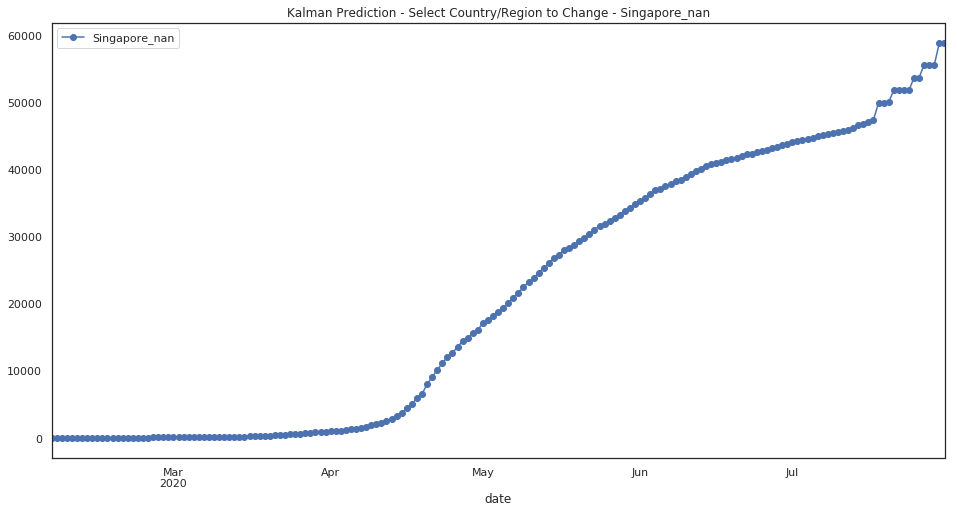

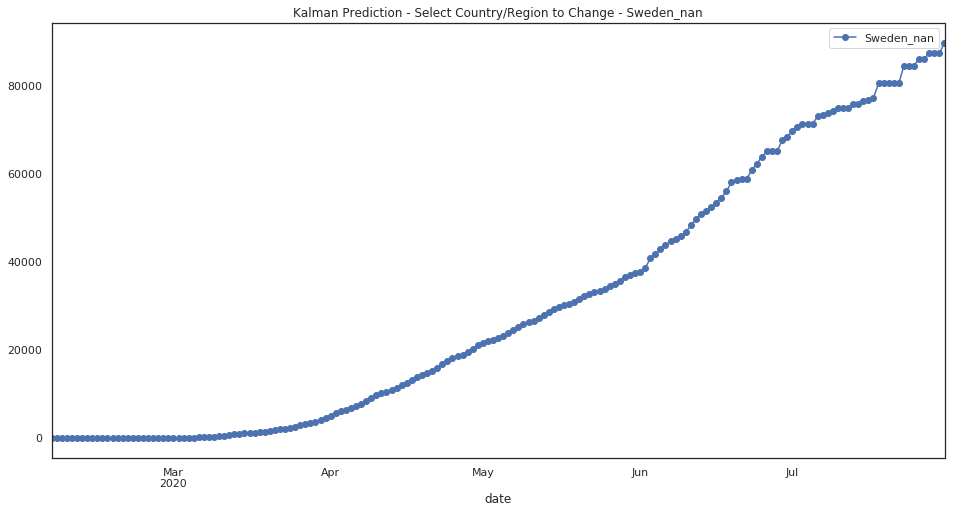

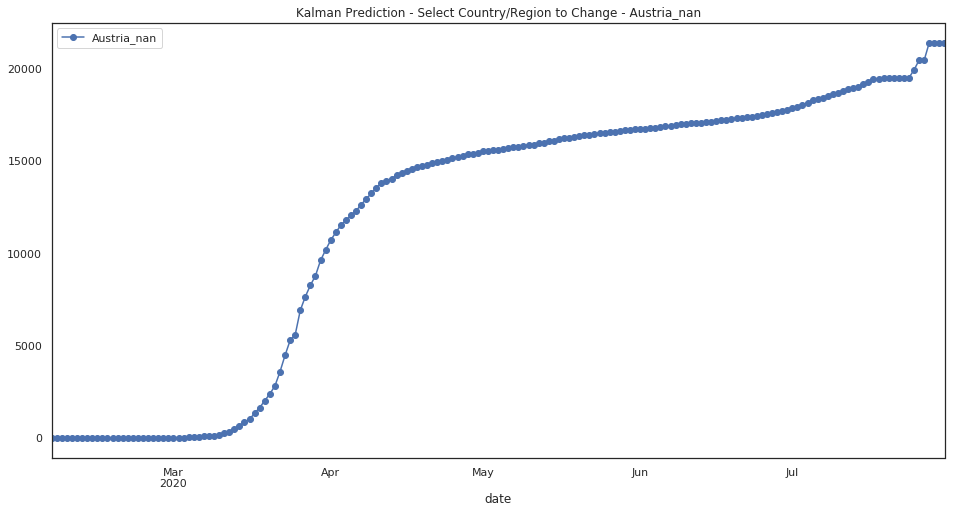

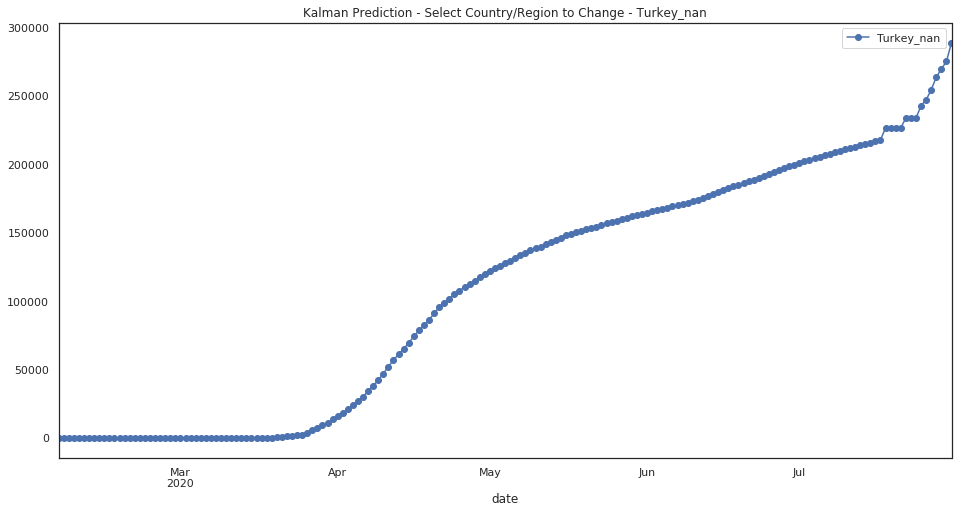

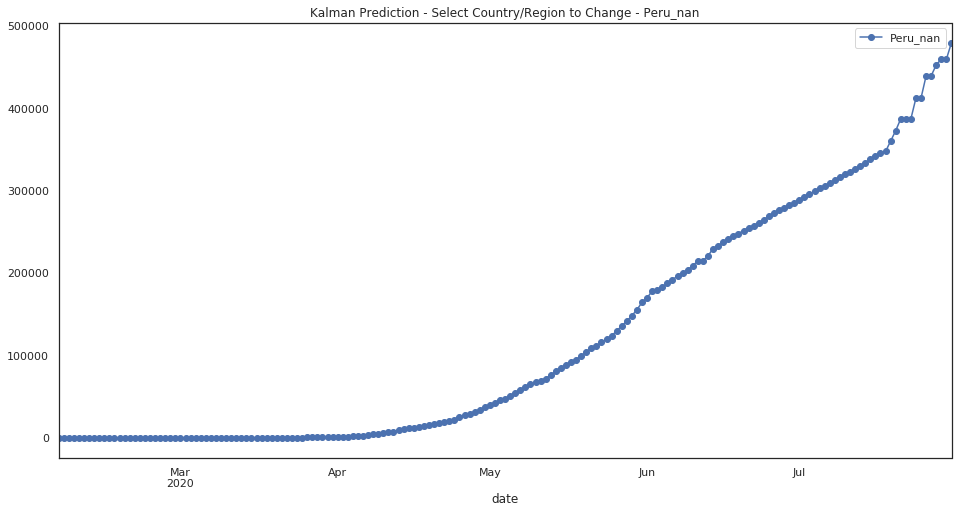

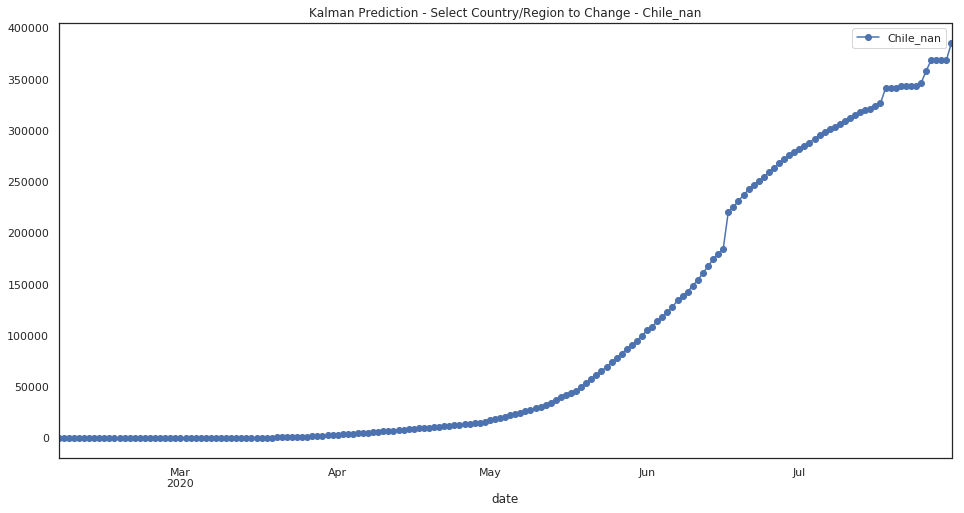

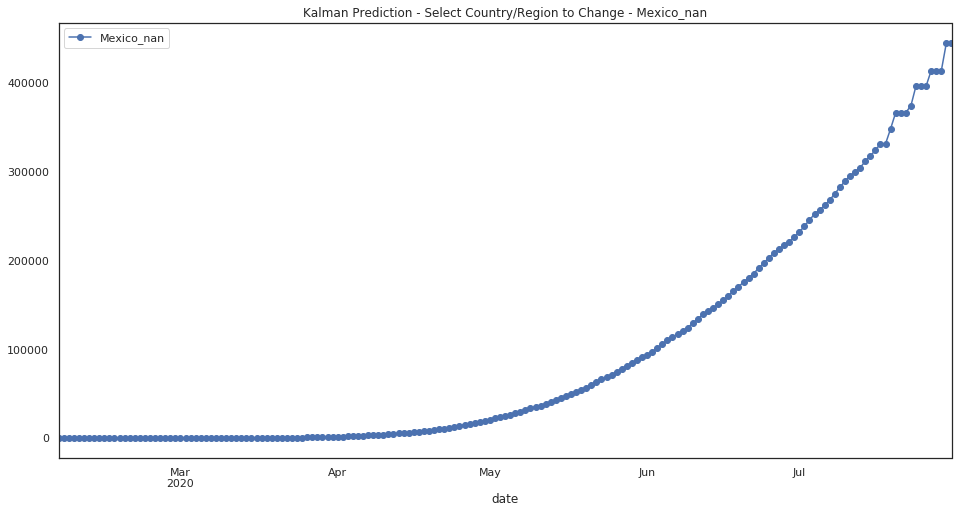

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-07-31 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       4620982.0
Brazil_nan                                    NaN       2900072.0
India_nan                                     NaN       1363600.0
Russia_nan                                    NaN        892010.0
South Africa_nan                              NaN        491860.0
Peru_nan                                      NaN        479493.0
Mexico_nan                                    NaN        445205.0
Chile_nan                                     NaN        385651.0
United Kingdom_nan                            NaN        337038.0
Iran_nan                                      NaN        334014.0
Pakistan_nan                                  NaN        328359.0
Spain_nan                                     NaN        313908.0
Saudi Arabia_nan                              NaN        304013.0
Turkey_nan                                    NaN        289041.0
Italy_nan                                     NaN        263397.0
Germany_nan                                   NaN        231251.0
Bangladesh_nan                                NaN        225388.0
Colombia_nan                                  NaN        221984.0
France_nan                                    NaN        209026.0
Argentina_nan                                 NaN        152907.0
Qatar_nan                                     NaN        150005.0
Iraq_nan                                      NaN        111909.0
Indonesia_nan                                 NaN        111590.0
Ecuador_nan                                   NaN         96815.0
Kazakhstan_nan                                NaN         93122.0
Philippines_nan                               NaN         90455.0
Egypt_nan                                     NaN         89889.0
Sweden_nan                                    NaN         89845.0
Belarus_nan                                   NaN         85802.0
Oman_nan                                      NaN         80747.0
...                                           ...             ...
Canada_Prince Edward Island                   NaN            46.0
Saint Vincent and the Grenadines_nan          NaN            44.0
Australia_Northern Territory                  NaN            33.0
Netherlands_Curacao                           NaN            29.0
Grenada_nan                                   NaN            28.0
Timor-Leste_nan                               NaN            27.0
France_New Caledonia                          NaN            26.0
Fiji_nan                                      NaN            26.0
Saint Lucia_nan                               NaN            26.0
China_Qinghai                                 NaN            24.0
Laos_nan                                      NaN            21.0
Papua New Guinea_nan                          NaN            21.0
Saint Kitts and Nevis_nan                     NaN            20.0
Dominica_nan                                  NaN            20.0
Canada_Yukon                                  NaN            16.0
United Kingdom_Montserrat                     NaN            16.0
United Kingdom_Falkland Islands (Malvinas)    NaN            14.0
Canada_Grand Princess                         NaN            14.0
Holy See_nan                                  NaN            14.0
Denmark_Greenland                             NaN            14.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN            11.0
Western Sahara_nan                            NaN            10.0
MS Zaandam_nan                                NaN             9.0
United Kingdom_British Virgin Islands         NaN             8.0
France_Saint Barthelemy                       NaN             6.0
France_Saint Pierre and Miquelon              NaN             6.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
Canada_Diamond Princess                       NaN             1.0
China_Tibet           

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06              6.0          6.0          6.0          6.0   
2020-02-07              6.0          6.0          6.0          6.0   
2020-02-08              6.0          6.0          6.0          6.0   
2020-02-09              6.0          6.0          6.0          6.0   
2020-02-10              6.0          6.0          6.0          6.0   
2020-02-11              6.0          6.0          6.0          6.0   
2020-02-12              6.0          6.0          6.0          6.0   
2020-02-13              6.0          6.0          6.0          6.0   
2020-02-14              6.0          6.0          6.0          6.0   
2020-02-15              6.0          6.0          6.0          6.0   
2020-02-16              6.0          6.0          6.0          6.0   
2020-02-17              6.0          6.0          6.0          6.0   
2020-02-18              0.0          6.0          0.0          6.0   
2020-02-19              2.0          6.0          0.0          6.0   
2020-02-20              0.0          6.0          0.0          6.0   
2020-02-21              0.0          6.0          0.0          6.0   
2020-02-22              0.0          6.0          0.0          6.0   
2020-02-23              0.0          6.0         -0.0          6.0   
2020-02-24              0.0          6.0          0.0          6.0   
2020-02-25              1.0          6.0          1.0          6.0   
2020-02-26              1.0          6.0          1.0          6.0   
2020-02-27              1.0          6.0          1.0          6.0   
2020-02-28              1.0          6.0          1.0          6.0   
2020-02-29              1.0          6.0          1.0          6.0   
2020-03-01              1.0          6.0          1.0          6.0   
2020-03-02              1.0          6.0          1.0          6.0   
2020-03-03              1.0          6.0          3.0          7.0   
2020-03-04              1.0          6.0         22.0          1.0   
2020-03-05              1.0          6.0         61.0          1.0   
2020-03-06              1.0          6.0         40.0          2.0   
...                     ...          ...          ...          ...   
2020-07-03          32253.0       2738.0      15011.0        855.0   
2020-07-04          32611.0       2829.0      15451.0        855.0   
2020-07-05          32993.0       2885.0      15901.0        855.0   
2020-07-06          33219.0       2962.0      16359.0        855.0   
2020-07-07          33439.0       3035.0      16847.0        855.0   
2020-07-08          33619.0       3109.0      17339.0        855.0   
2020-07-09          33839.0       3179.0      17815.0        855.0   
2020-07-10          34204.0       3266.0      18278.0        855.0   
2020-07-11          34457.0       3358.0      18710.0        855.0   
2020-07-12          34553.0       3452.0      19201.0        855.0   
2020-07-13          34592.0       3534.0      19694.0        855.0   
2020-07-14          34584.0       3667.0      20193.0        858.0   
2020-07-15          34991.0       3755.0      20737.0        861.0   
2020-07-16          35204.0       3838.0      21309.0        862.0   
2020-07-17          35171.0       3943.0      21914.0        877.0   
2020-07-18          35469.0       3995.0      22478.0        880.0   
2020-07-19          37375.0       4328.0      22317.0        880.0   
2020-07-20          36748.0       4223.0      22873.0        912.0   
2020-07-21          36958.0       4395.0      23566.0        912.0   
2020-07-22          37007.0       4351.0      23229.0        926.0   
2020-07-23          37013.0       4348.0      23201.0        971.0   
2020-07-24          37643.0       4465.0      23295.0        994.0   
2020-07-25          37536.0       4421.0      24958.0        999.0   
2020-07-26          39366.0       4406.0      25100.0       1065.0   
2020-07-27

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
#pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'Russia_nan',
 'South Africa_nan',
 'Peru_nan',
 'Mexico_nan',
 'Chile_nan',
 'United Kingdom_nan',
 'Iran_nan',
 'Pakistan_nan',
 'Spain_nan',
 'Saudi Arabia_nan',
 'Turkey_nan',
 'Italy_nan',
 'Germany_nan',
 'Bangladesh_nan',
 'Colombia_nan',
 'France_nan',
 'Argentina_nan',
 'Qatar_nan',
 'Iraq_nan',
 'Indonesia_nan',
 'Ecuador_nan',
 'Kazakhstan_nan',
 'Philippines_nan',
 'Egypt_nan',
 'Sweden_nan',
 'Belarus_nan',
 'Oman_nan',
 'Israel_nan',
 'China_Hubei',
 'United Arab Emirates_nan',
 'Belgium_nan',
 'Bolivia_nan',
 'Canada_Quebec',
 'Kuwait_nan',
 'Ukraine_nan',
 'Panama_nan',
 'Singapore_nan',
 'Portugal_nan',
 'Dominican Republic_nan',
 'Netherlands_nan',
 'Nigeria_nan',
 'Canada_Ontario',
 'Romania_nan',
 'Guatemala_nan',
 'Afghanistan_nan',
 'Poland_nan',
 'Armenia_nan',
 'Bahrain_nan',
 'Switzerland_nan',
 'Honduras_nan',
 'Ghana_nan',
 'Japan_nan',
 'Azerbaijan_nan',
 'Ireland_nan',
 'Algeria_nan',
 'Serbia_nan',
 'Mold

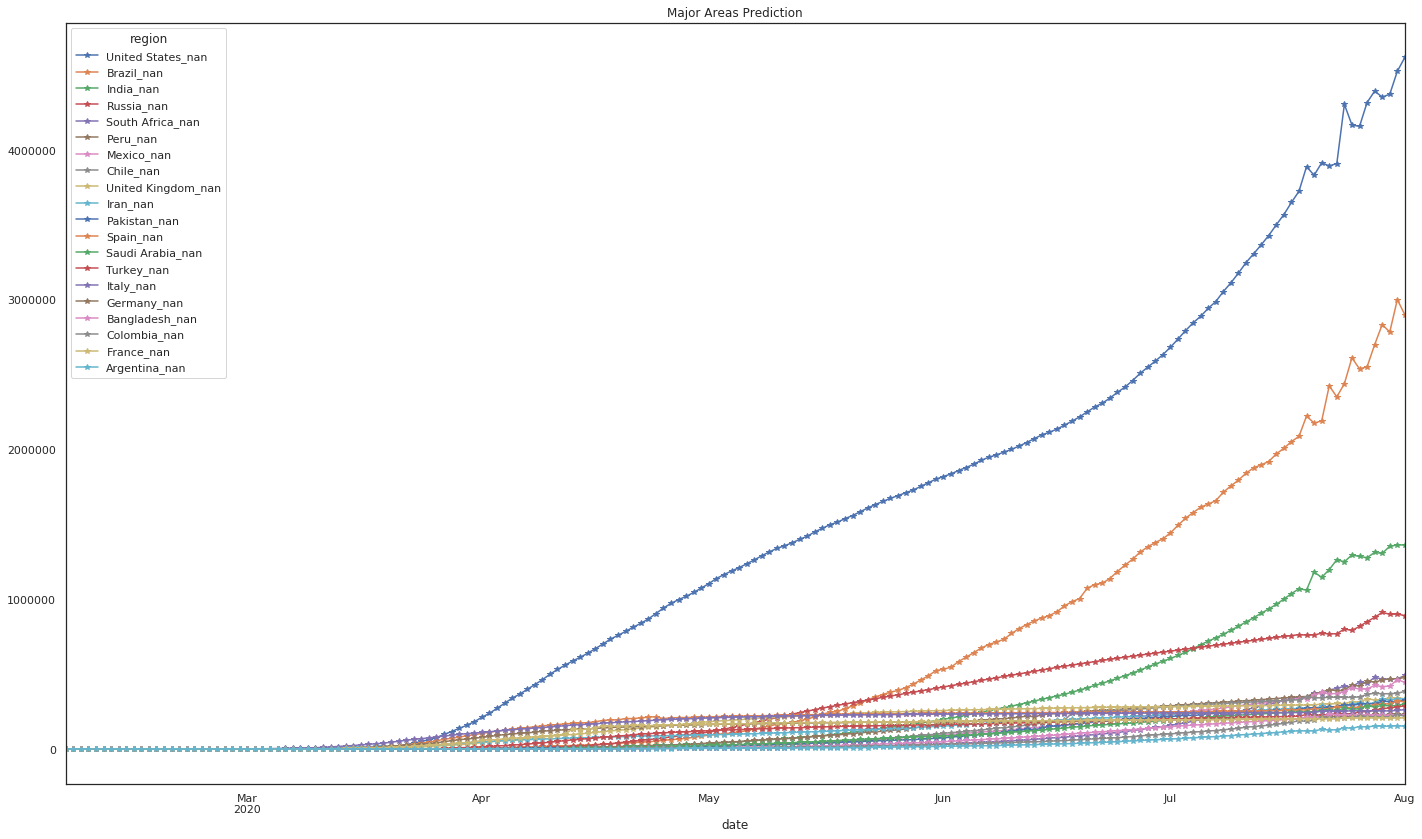

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

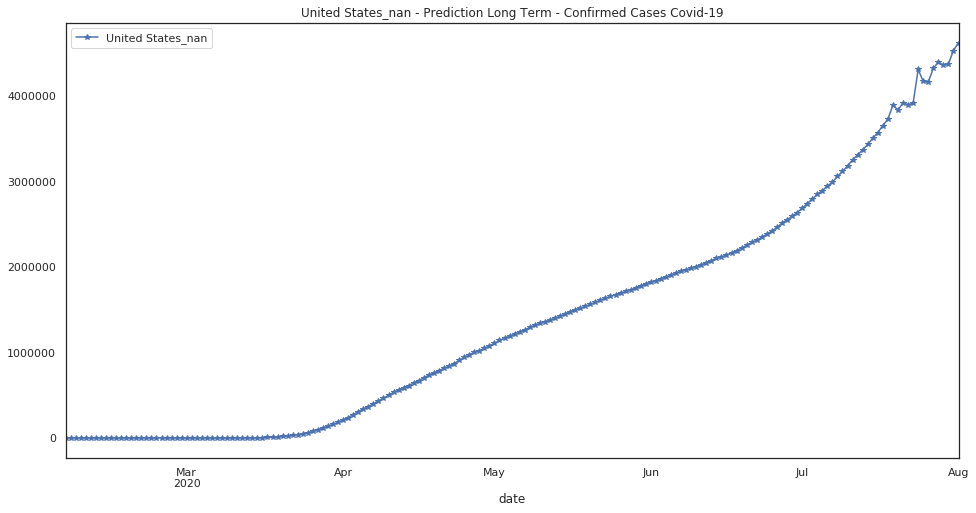

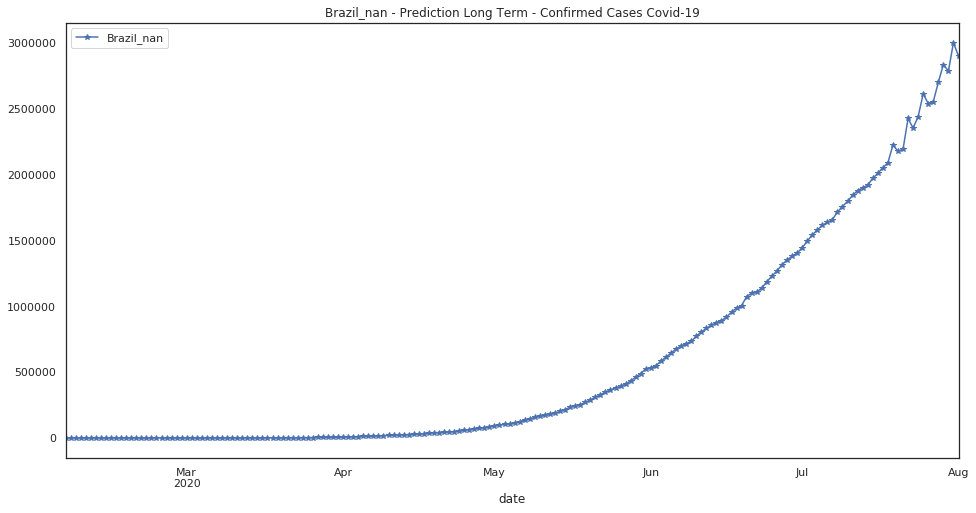

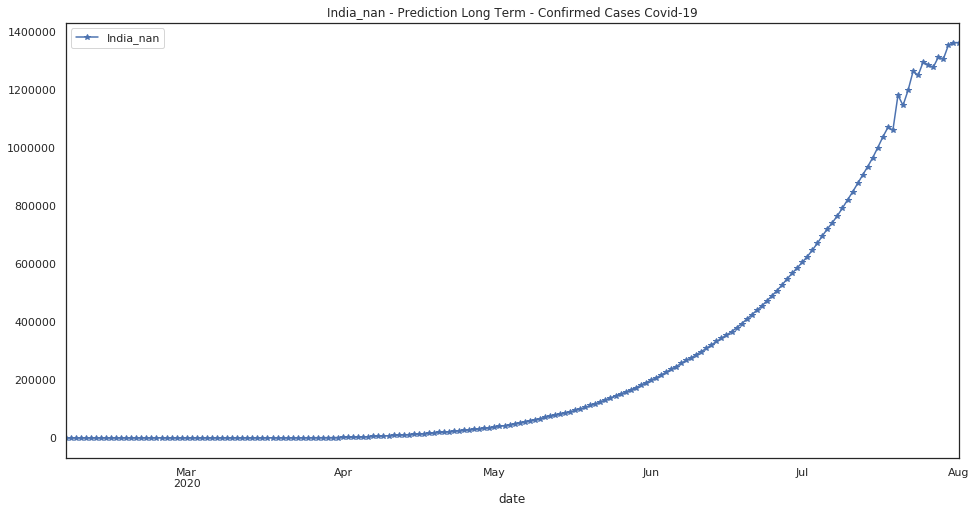

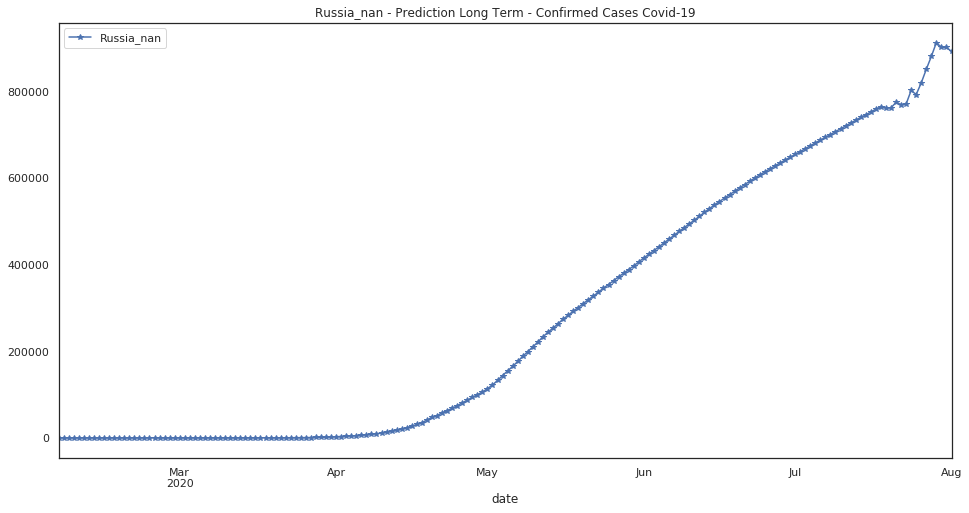

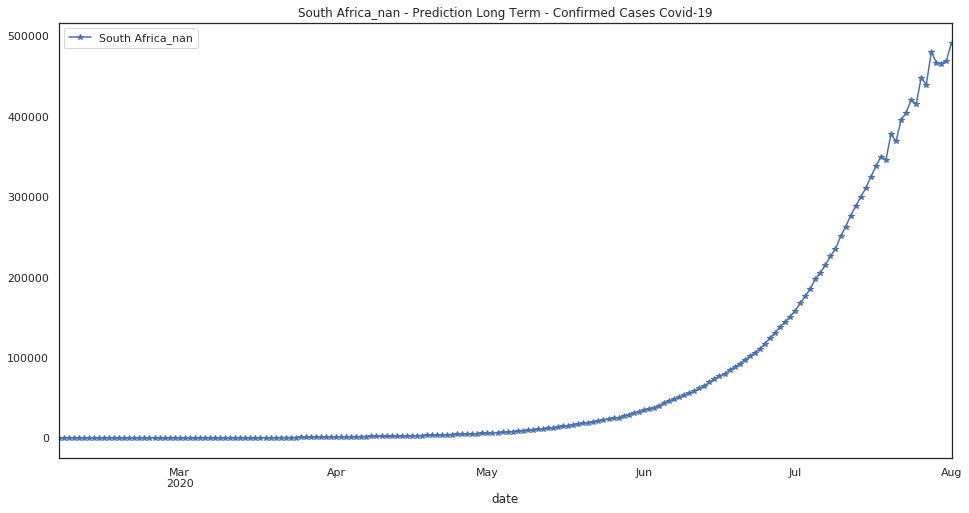

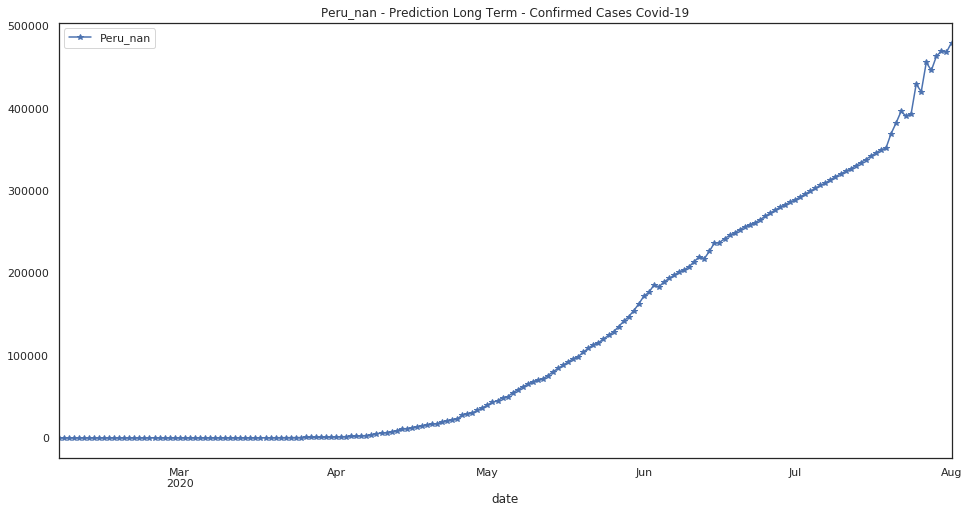

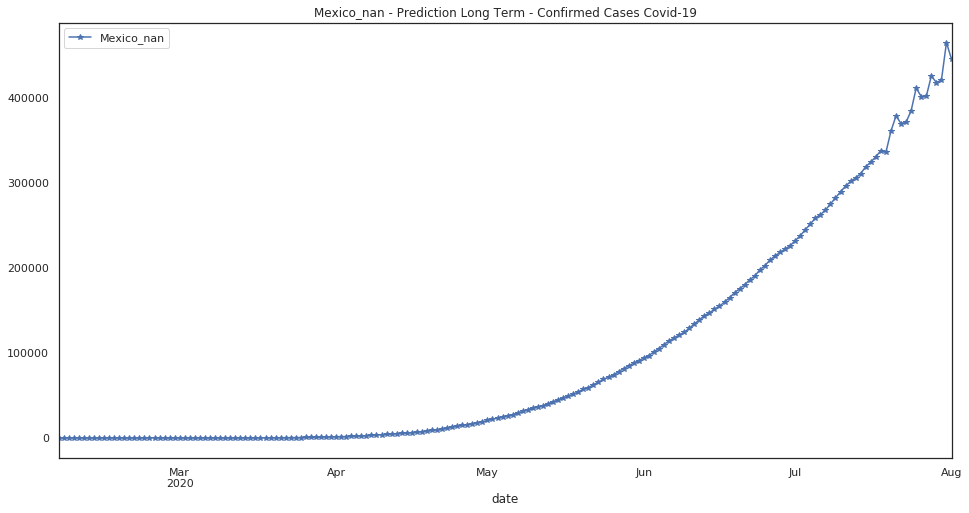

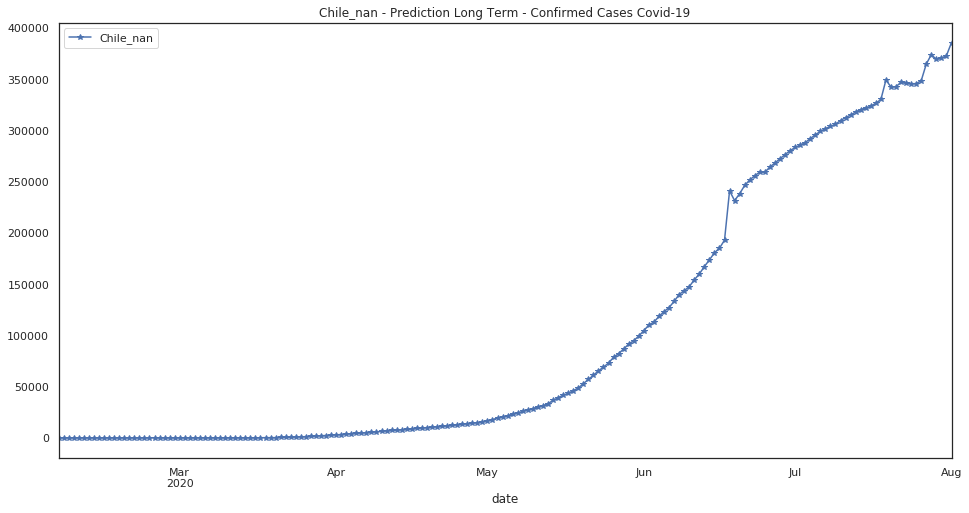

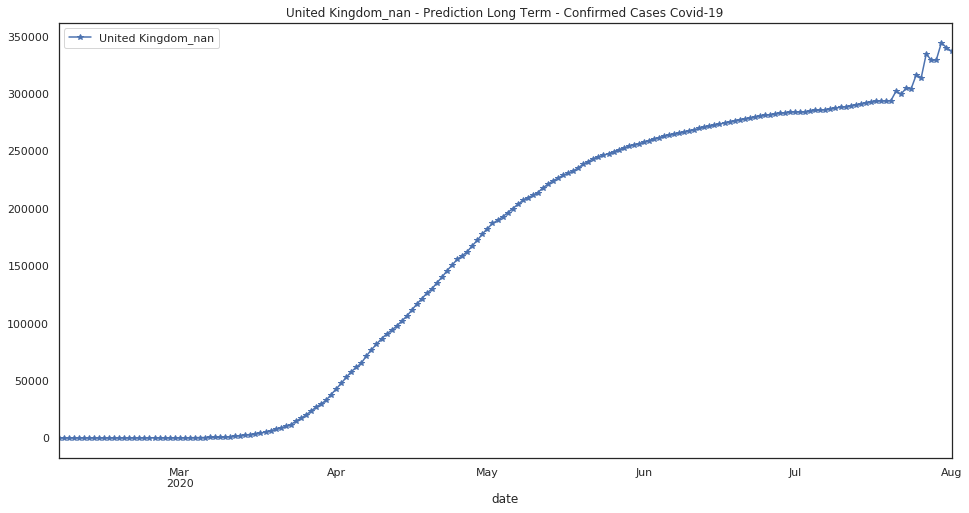

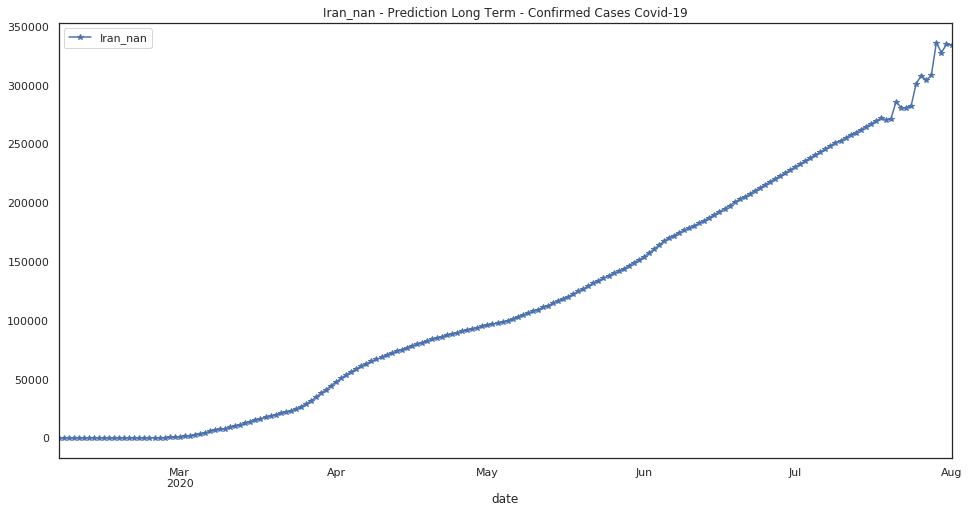

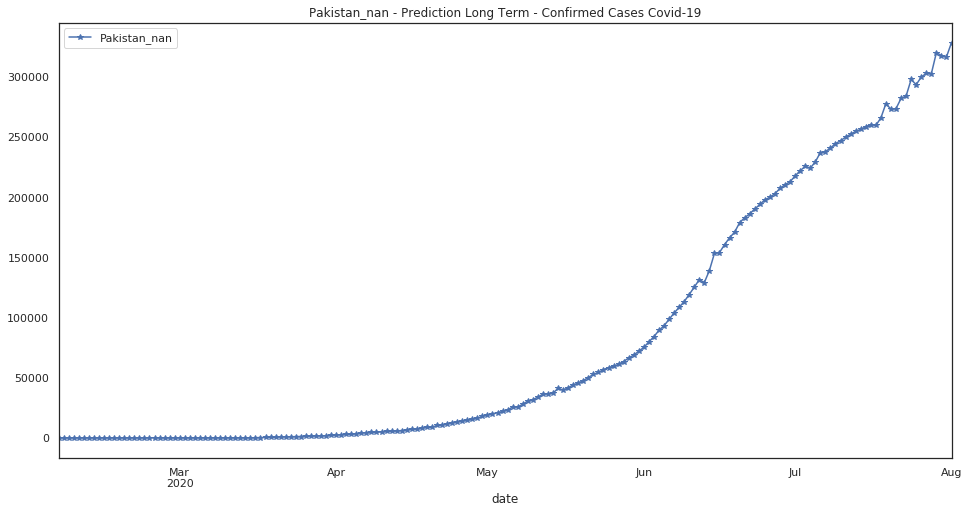

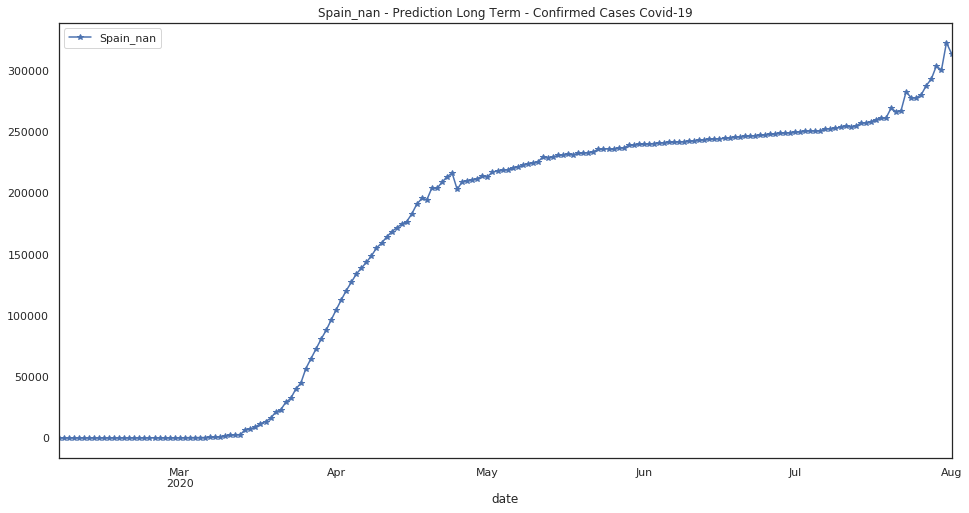

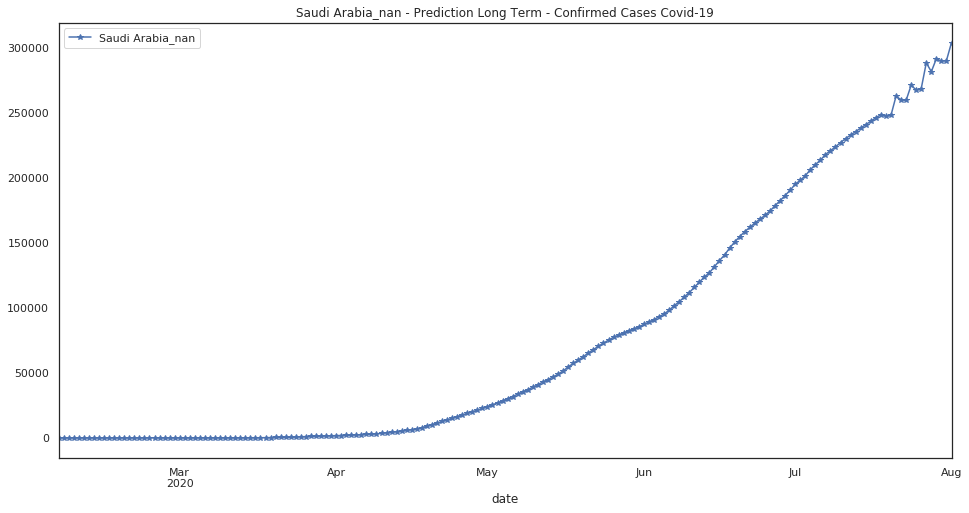

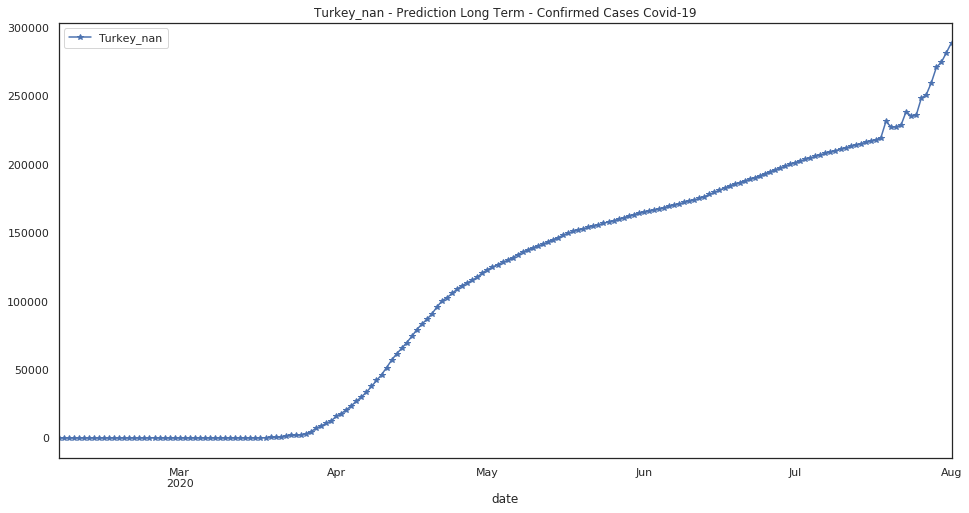

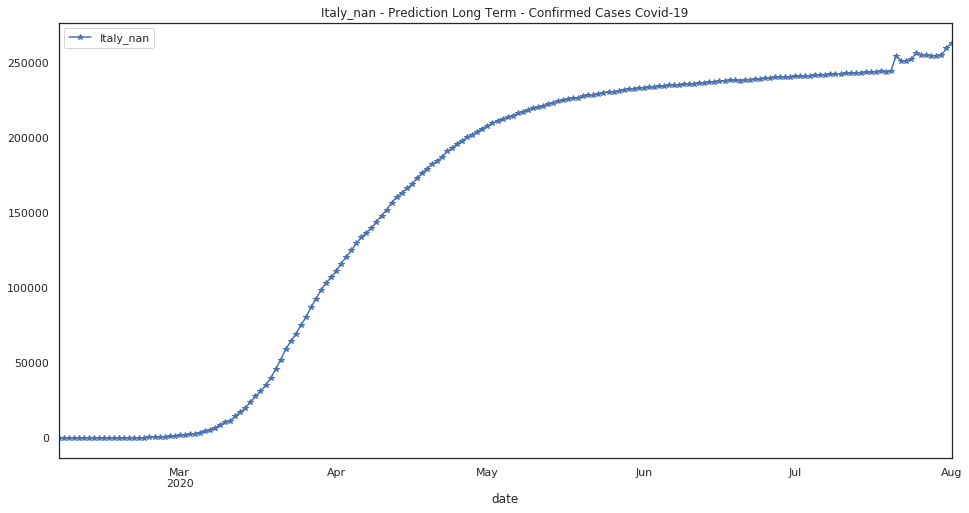

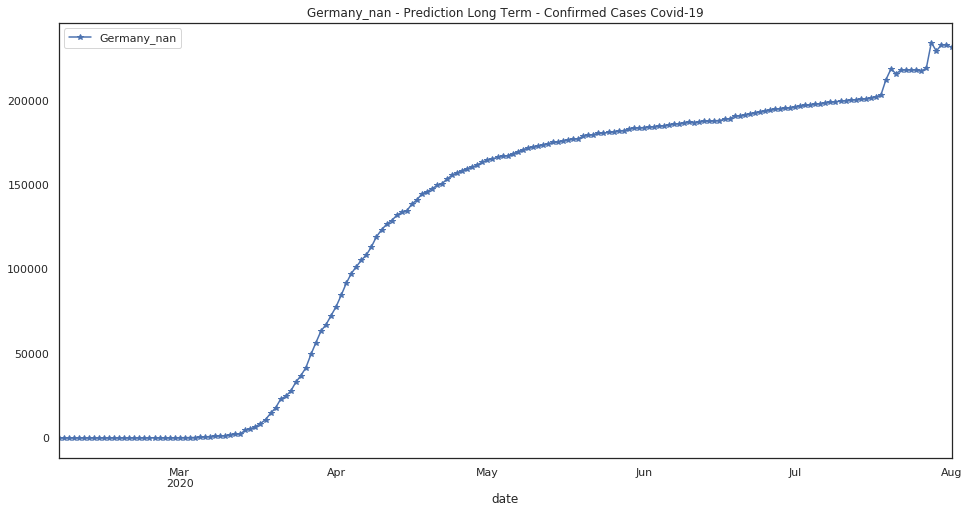

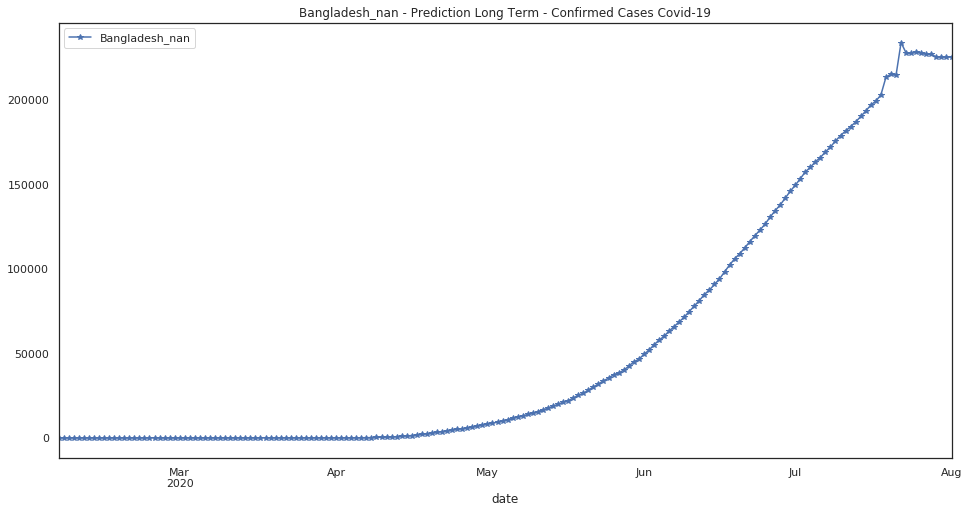

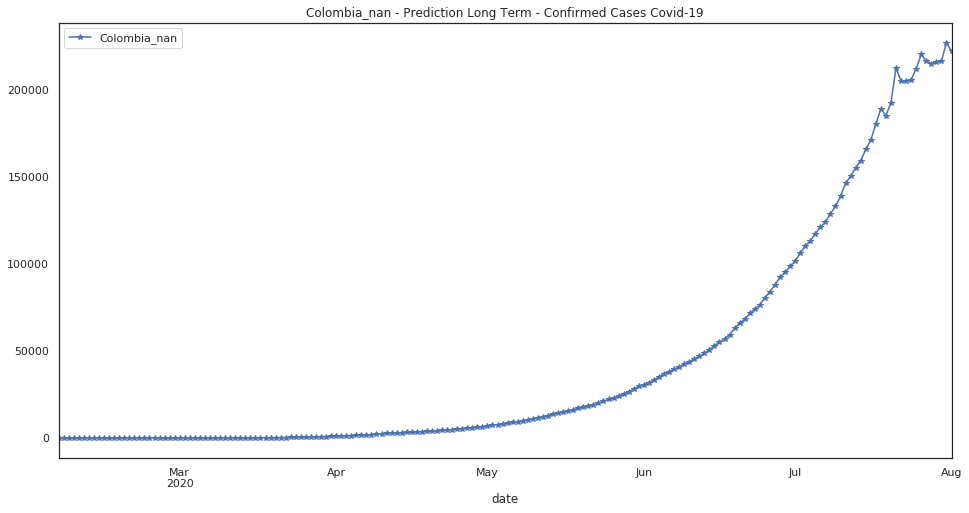

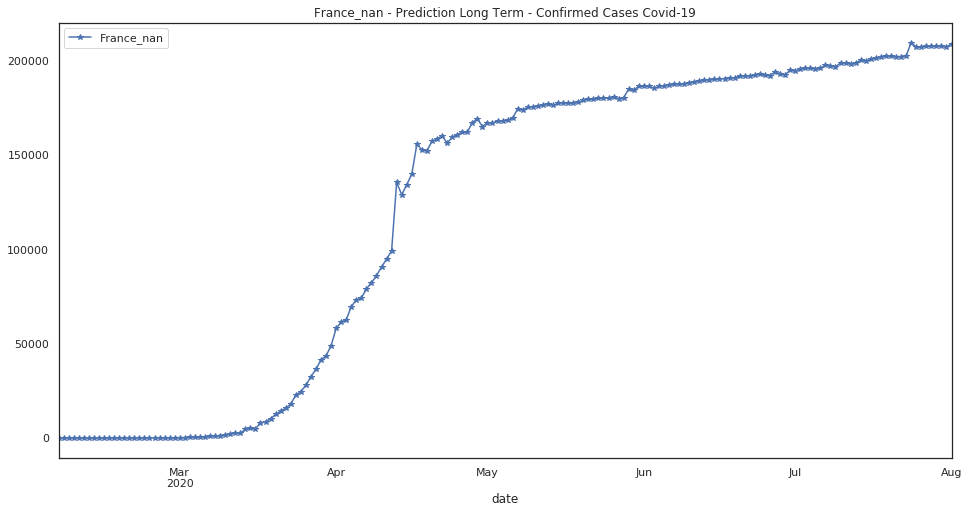

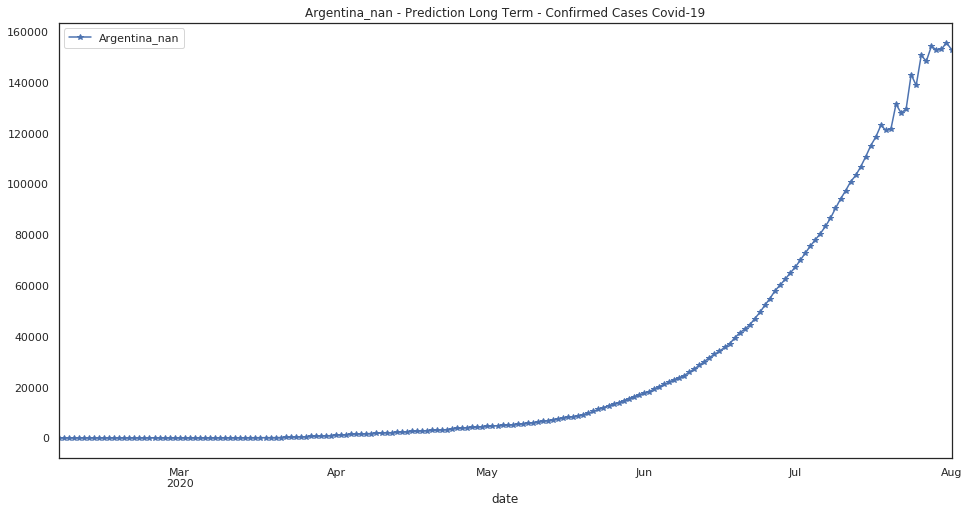

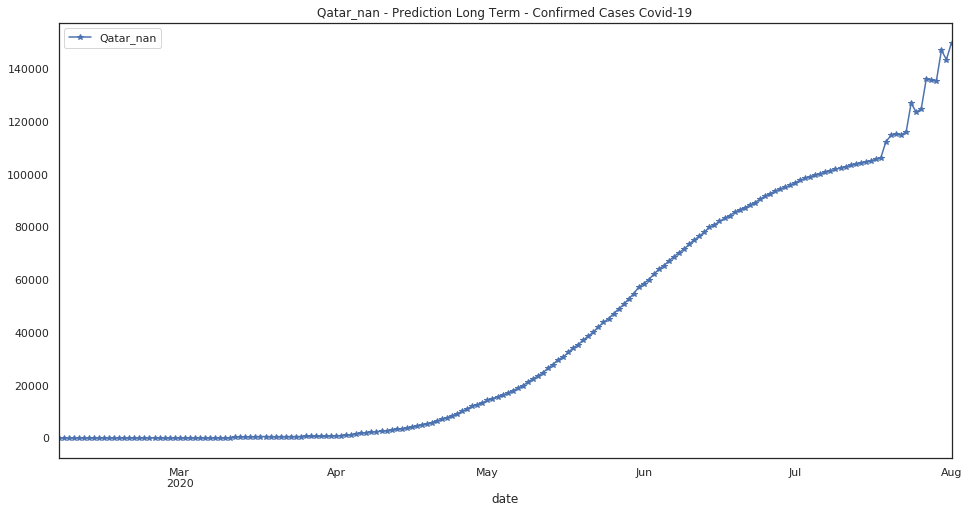

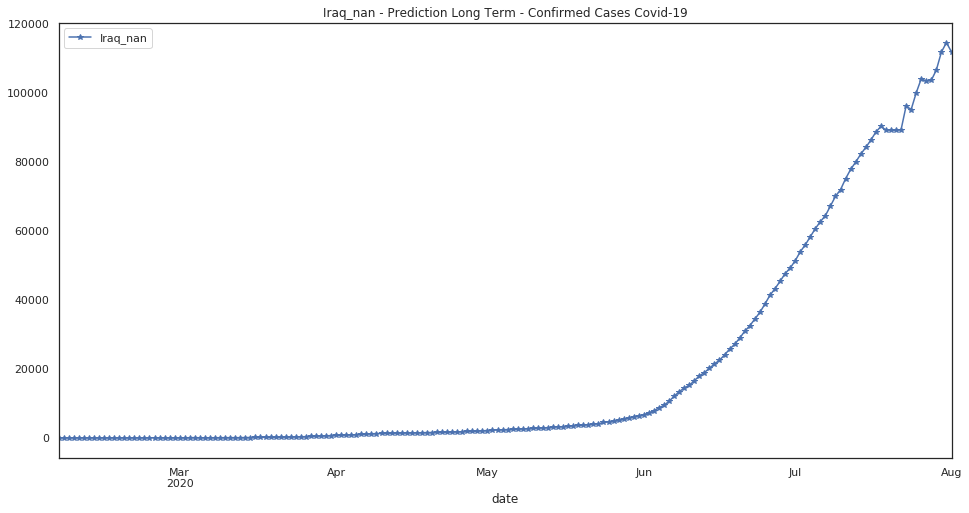

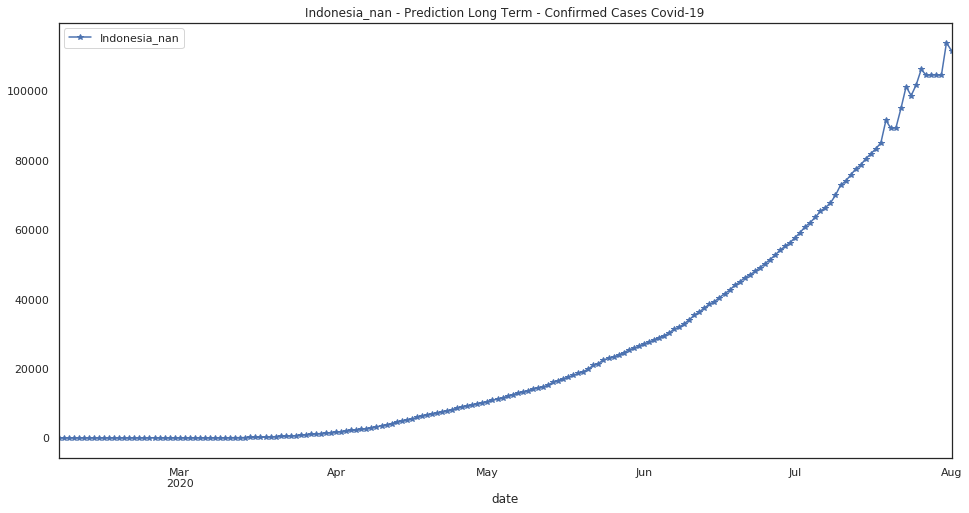

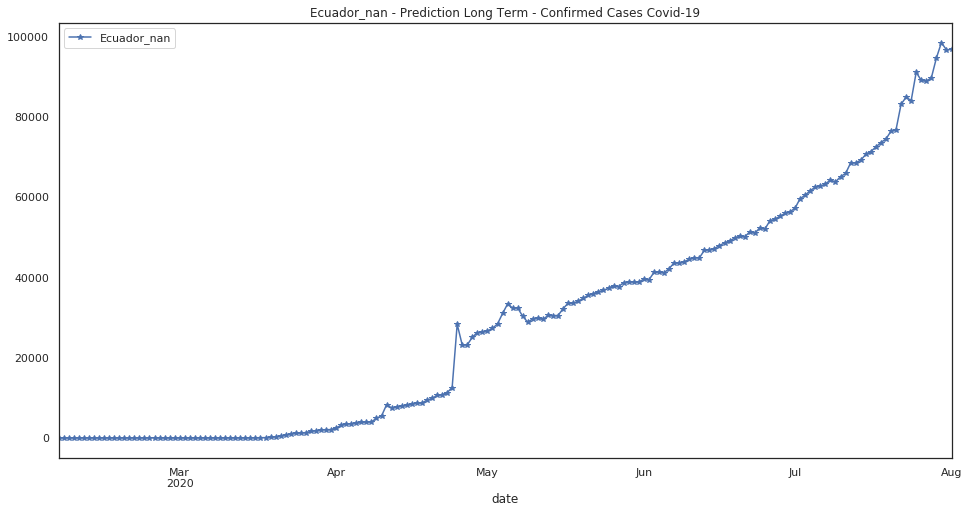

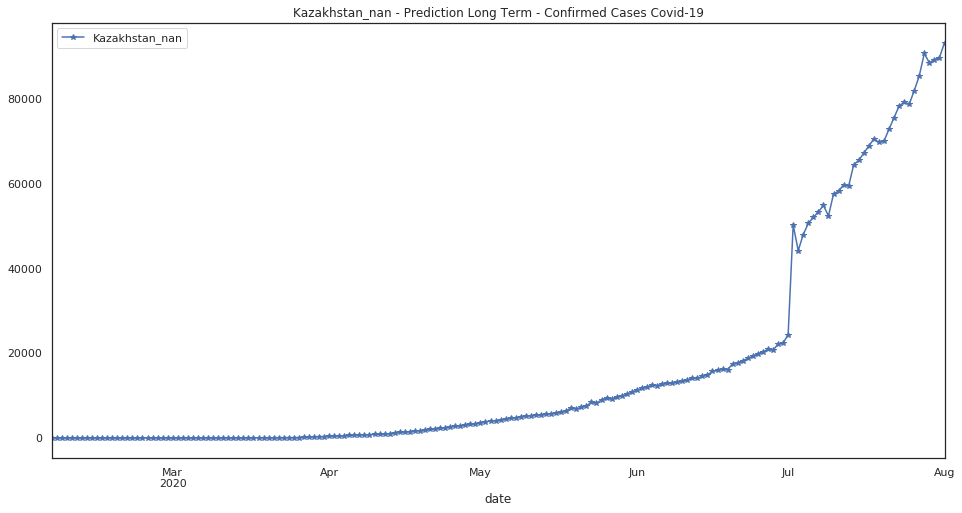

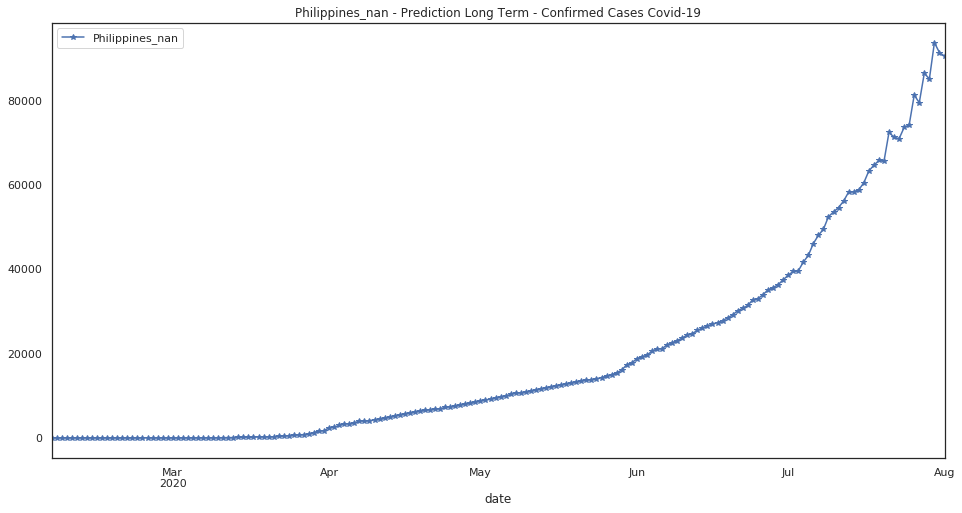

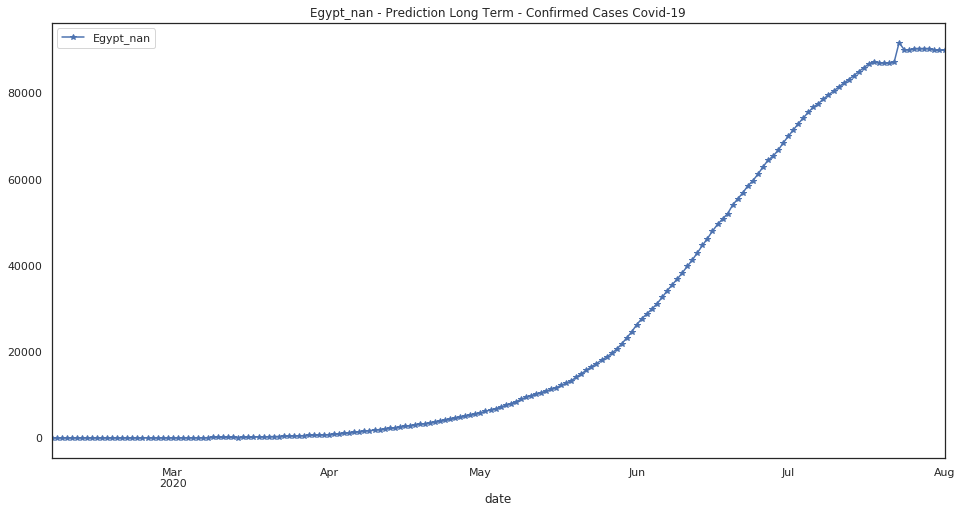

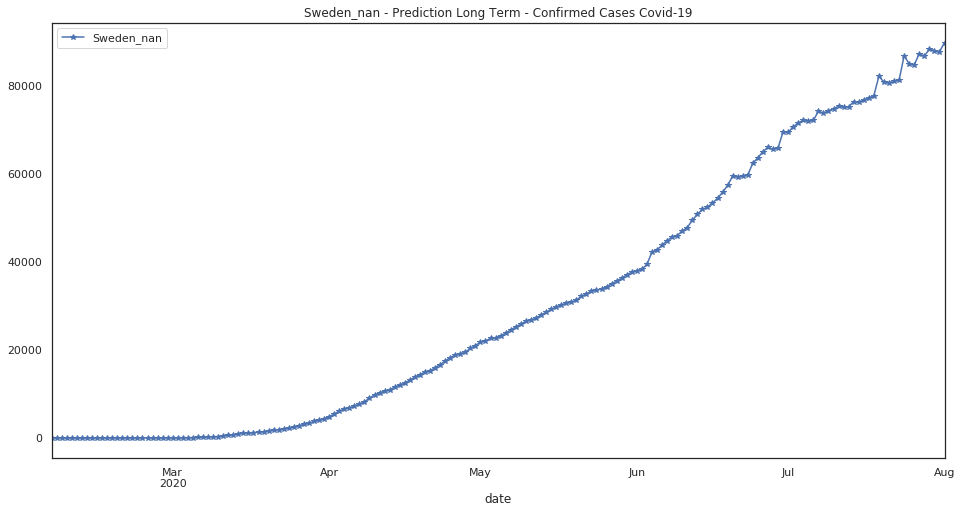

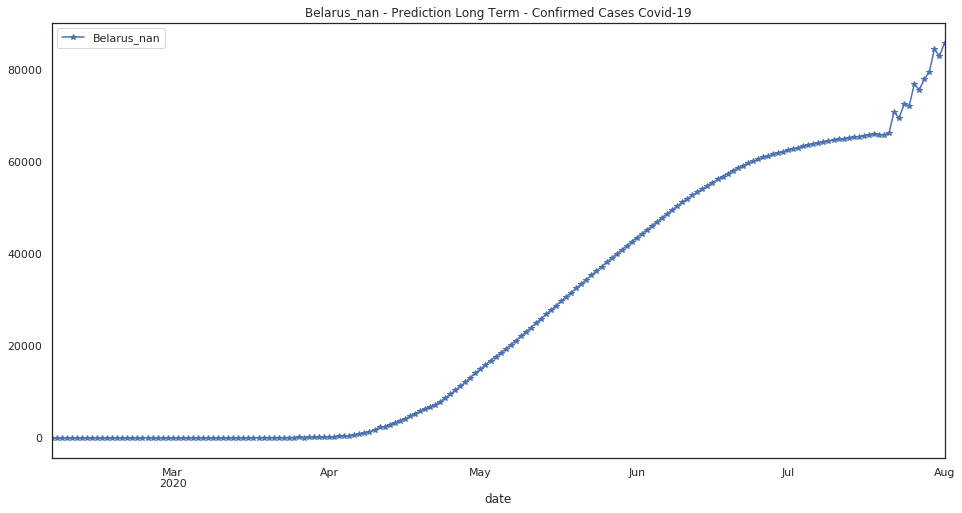

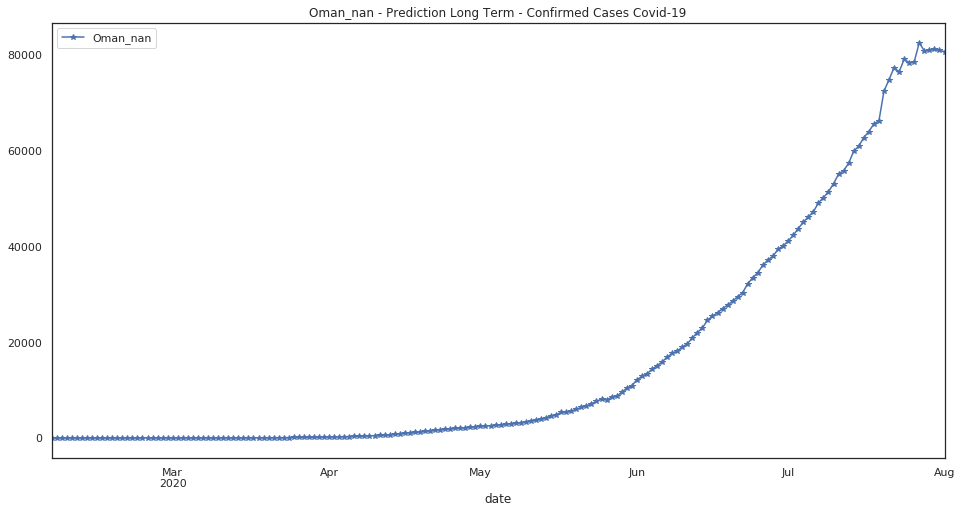

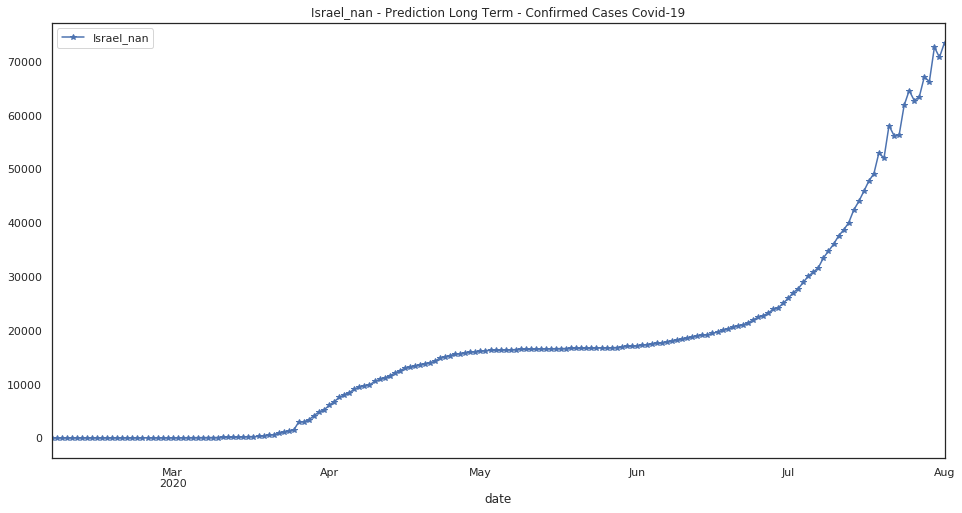

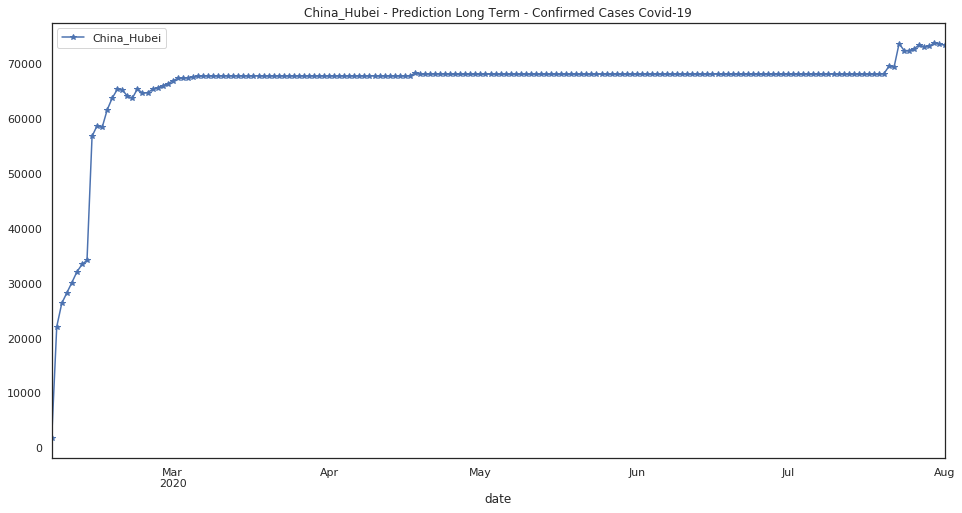

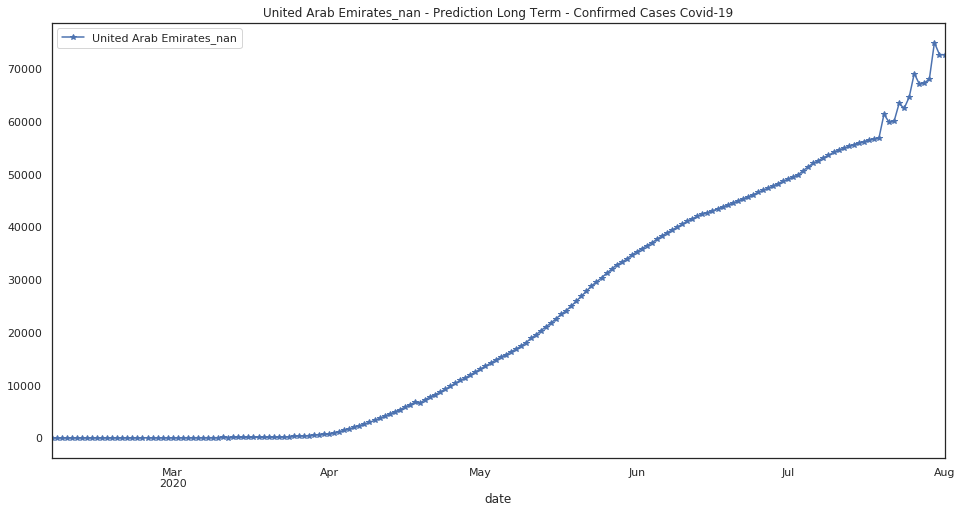

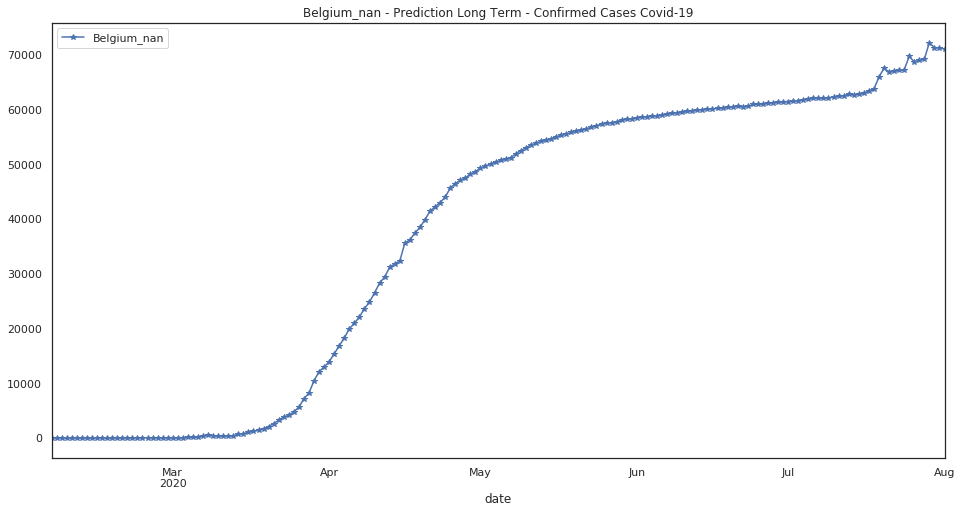

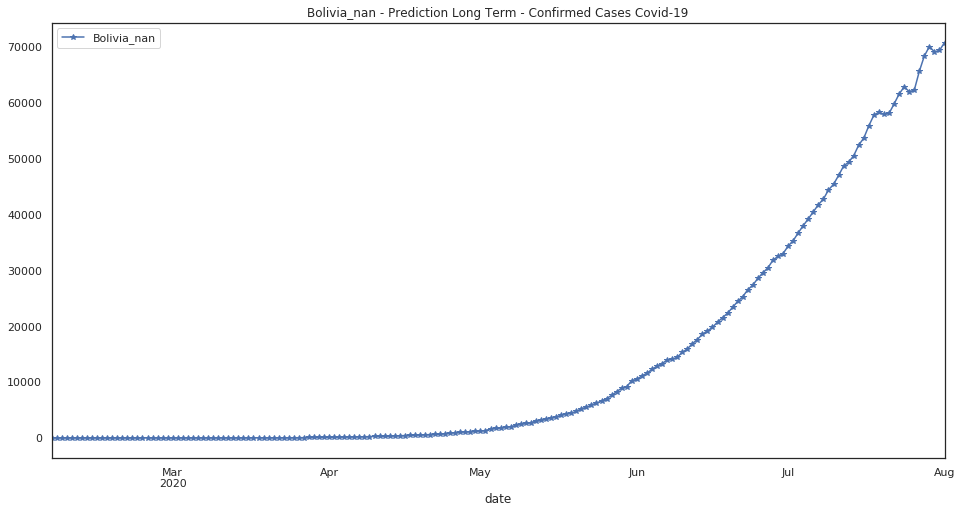

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

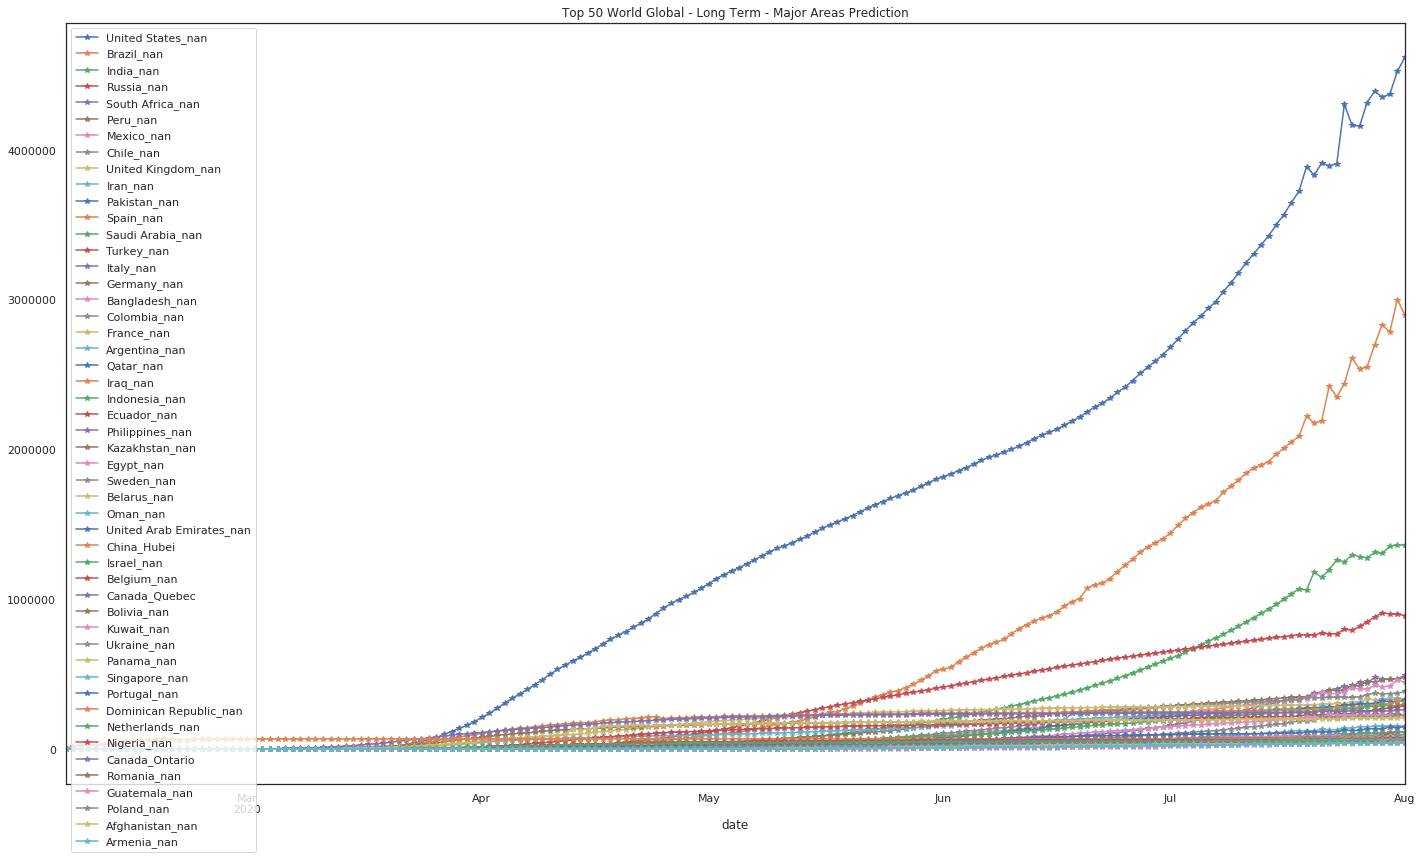

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

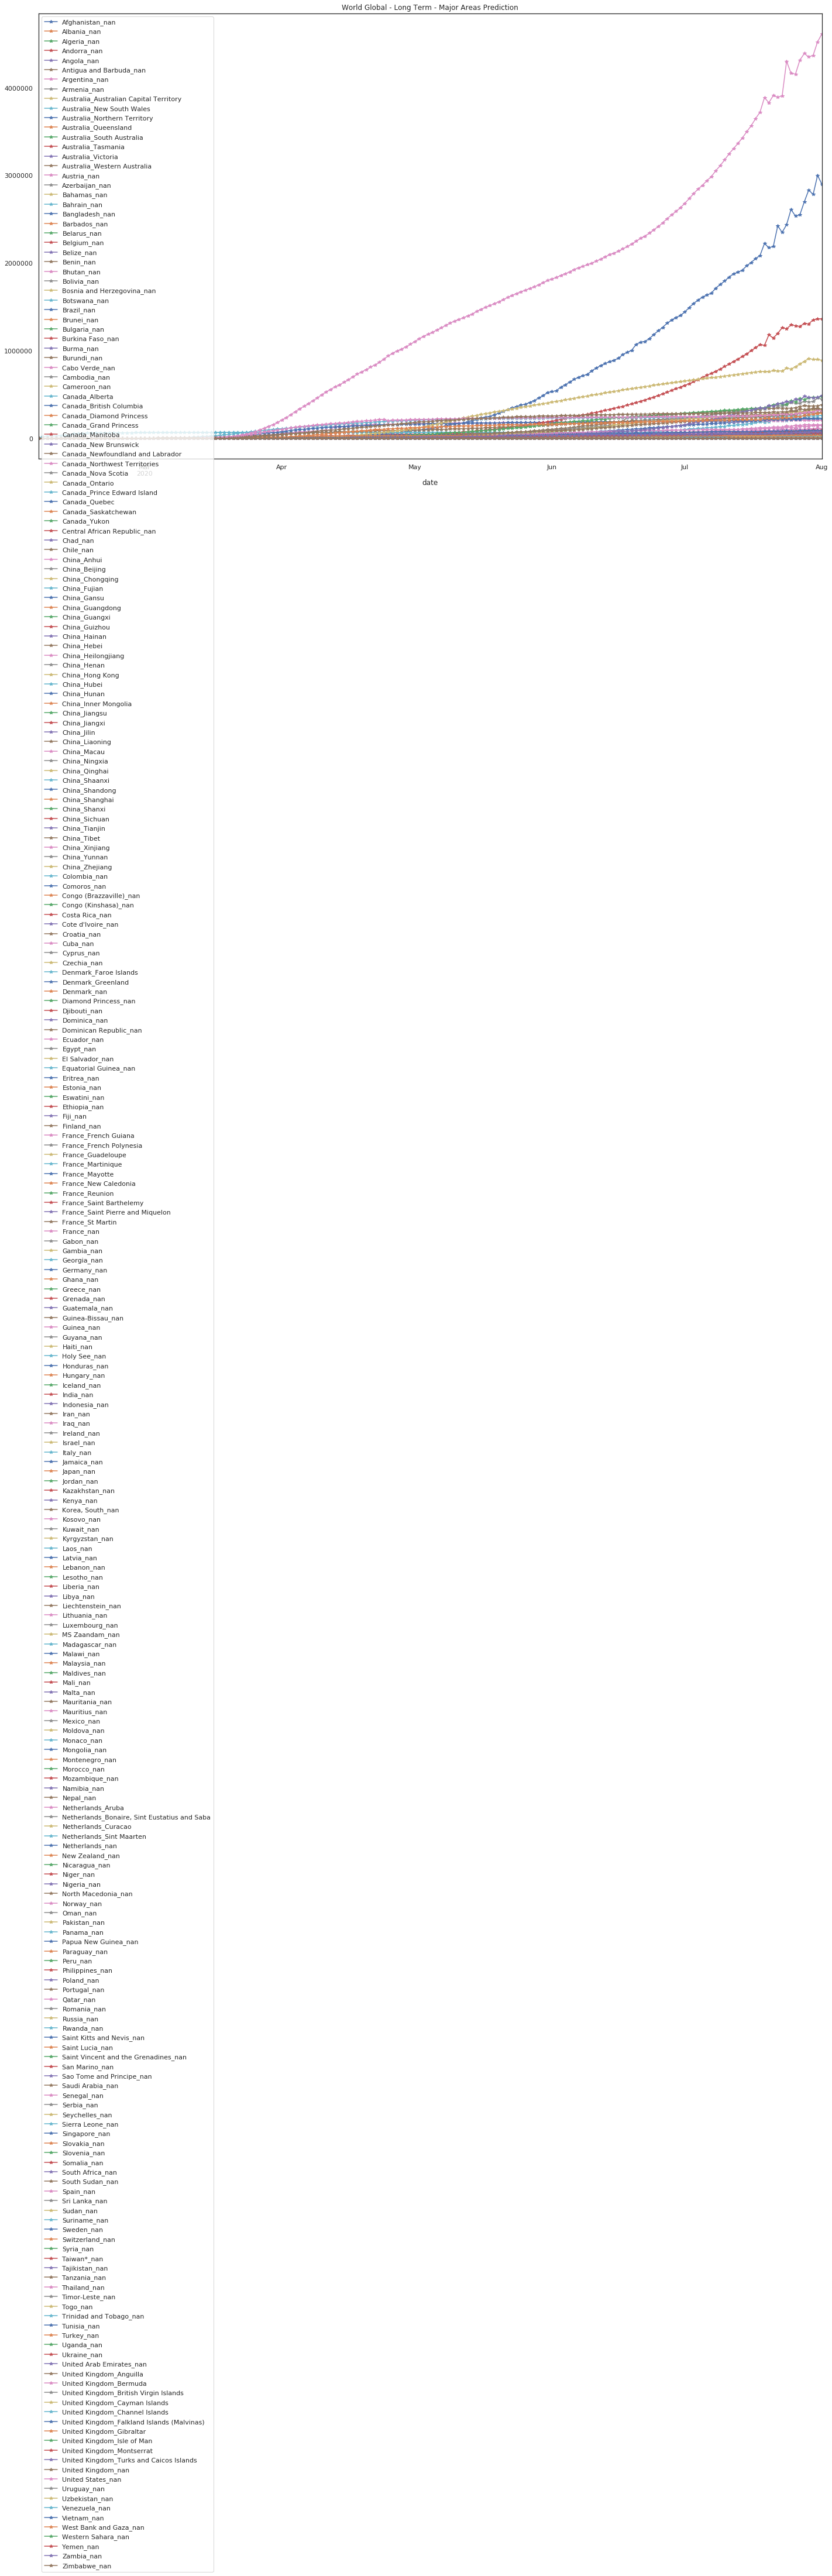

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             24.0         87.0        174.0        245.0   
2020-03-23             43.0        104.0        243.0        315.0   
2020-03-24             42.0        120.0        262.0        254.0   
2020-03-25             90.0        142.0        301.0        177.0   
2020-03-26             95.0        169.0        346.0        200.0   
2020-03-27            107.0        200.0        424.0        238.0   
2020-03-28            125.0        206.0        461.0        278.0   
2020-03-29            120.0        218.0        505.0        314.0   
2020-03-30            134.0        235.0        567.0        334.0   
2020-03-31            200.0        245.0        654.0        370.0   
2020-04-01            185.0        267.0        815.0        376.0   
2020-04-02            272.0        280.0        951.0        390.0   
2020-04-03            299.0        297.0       1099.0        428.0   
2020-04-04            295.0        329.0       1308.0        439.0   
2020-04-05            325.0        360.0       1350.0        466.0   
2020-04-06            389.0        388.0       1425.0        501.0   
2020-04-07            391.0        399.0       1549.0        525.0   
2020-04-08            463.0        402.0       1566.0        545.0   
2020-04-09            468.0        424.0       1688.0        564.0   
2020-04-10            514.0        429.0       1772.0        583.0   
2020-04-11            554.0        433.0       1849.0        601.0   
2020-04-12            589.0        452.0       1903.0        601.0   
2020-04-13            648.0        462.0       2005.0        638.0   
2020-04-14            711.0        484.0       2065.0        646.0   
2020-04-15            755.0        489.0       2162.0        659.0   
2020-04-16            837.0        513.0       2253.0        673.0   
2020-04-17            890.0        540.0       2370.0        673.0   
2020-04-18            959.0        559.0       2537.0        696.0   
2020-04-19            975.0        563.0       2639.0        704.0   
2020-04-20           1051.0        581.0       2727.0        713.0   
...                     ...          ...          ...          ...   
2020-07-03          32253.0       2738.0      15011.0        855.0   
2020-07-04          32611.0       2829.0      15451.0        855.0   
2020-07-05          32993.0       2885.0      15901.0        855.0   
2020-07-06          33219.0       2962.0      16359.0        855.0   
2020-07-07          33439.0       3035.0      16847.0        855.0   
2020-07-08          33619.0       3109.0      17339.0        855.0   
2020-07-09          33839.0       3179.0      17815.0        855.0   
2020-07-10          34204.0       3266.0      18278.0        855.0   
2020-07-11          34457.0       3358.0      18710.0        855.0   
2020-07-12          34553.0       3452.0      19201.0        855.0   
2020-07-13          34592.0       3534.0      19694.0        855.0   
2020-07-14          34584.0       3667.0      20193.0        858.0   
2020-07-15          34991.0       3755.0      20737.0        861.0   
2020-07-16          35204.0       3838.0      21309.0        862.0   
2020-07-17          35171.0       3943.0      21914.0        877.0   
2020-07-18          35469.0       3995.0      22478.0        880.0   
2020-07-19          37375.0       4328.0      22317.0        880.0   
2020-07-20          36748.0       4223.0      22873.0        912.0   
2020-07-21          36958.0       4395.0      23566.0        912.0   
2020-07-22          37007.0       4351.0      23229.0        926.0   
2020-07-23          37013.0       4348.0      23201.0        971.0   
2020-07-24          37643.0       4465.0      23295.0        994.0   
2020-07-25          37536.0       4421.0      24958.0        999.0   
2020-07-26          39366.0       4406.0      25100.0       1065.0   
2020-07-27

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.939110   67.709953   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -27.469800  153.025100   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -42.882100  147.327200   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.025885  -78.035889   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.469936   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  17.189900  -88.497600   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256                              Sierra Leone_nan   8.460555  -11.779889   
257  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
258                                    Malawi_nan -13.254300   34.301500   
259    United K

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
region_m2=region[:55]
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       0           Afghanistan_nan  33.939110   67.709953   
1       6             Argentina_nan -38.416100  -63.616700   
2       7               Armenia_nan  40.069100   45.038200   
3      19               Bahrain_nan  26.027500   50.550000   
4      20            Bangladesh_nan  23.685000   90.356300   
5      22               Belarus_nan  53.709800   27.953400   
6      23               Belgium_nan  50.833300    4.469936   
7      26               Bolivia_nan -16.290200  -63.588700   
8      28                Brazil_nan -14.235000  -51.925300   
9      42            Canada_Ontario  51.253800  -85.323200   
10     44             Canada_Quebec  52.939900  -73.549100   
11     48                 Chile_nan -35.675100  -71.543000   
12     62               China_Hubei  30.975600  112.270700   
13     82              Colombia_nan   4.570900  -74.297300   
14     96    Dominican Republic_nan  18.735700  -70.162700   
15     97               Ecuador_nan  -1.831200  -78.183400   
16     98                 Egypt_nan  26.820553   30.802498   
17    116                France_nan  46.227600    2.213700   
18    121               Germany_nan  51.165691   10.451526   
19    122                 Ghana_nan   7.946500   -1.023200   
20    124             Guatemala_nan  15.783500  -90.230800   
21    129              Honduras_nan  15.200000  -86.241900   
22    132                 India_nan  20.593684   78.962880   
23    133             Indonesia_nan  -0.789300  113.921300   
24    134                  Iran_nan  32.427908   53.688046   
25    135                  Iraq_nan  33.223191   43.679291   
26    137                Israel_nan  31.046051   34.851612   
27    138                 Italy_nan  41.871940   12.567380   
28    140                 Japan_nan  36.204824  138.252924   
29    142            Kazakhstan_nan  48.019600   66.923700   
30    145                Kuwait_nan  29.311660   47.481766   
31    160                Mexico_nan  23.634500 -102.552800   
32    171           Netherlands_nan  52.132600    5.291300   
33    175               Nigeria_nan   9.082000    8.675300   
34    178                  Oman_nan  21.512583   55.923255   
35    179              Pakistan_nan  30.375300   69.345100   
36    180                Panama_nan   8.538000  -80.782100   
37    183                  Peru_nan  -9.190000  -75.015200   
38    184           Philippines_nan  12.879721  121.774017   
39    185                Poland_nan  51.919400   19.145100   
40    186              Portugal_nan  39.399900   -8.224500   
41    187                 Qatar_nan  25.354800   51.183900   
42    188               Romania_nan  45.943200   24.966800   
43    189                Russia_nan  61.524010  105.318756   
44    194          Saudi Arabia_nan  23.885942   45.079162   
45    198             Singapore_nan   1.283300  103.833300   
46    202          South Africa_nan -30.559500   22.937500   
47    203                 Spain_nan  40.463667   -3.749220   
48    207                Sweden_nan  60.128161   18.643501   
49    208           Switzerland_nan  46.818200    8.227500   
50    215                Turkey_nan  38.963700   35.243300   
51    217               Ukraine_nan  48.379400   31.165600   
52    218  United Arab Emirates_nan  23.424076   53.847818   
53    225        United Kingdom_nan  55.378100   -3.436000   
54    227         United States_nan  40.000000 -100.000000   

    2020-02-06 00:00:00  2020-02-07 00:00:00  2020-02-08 00:00:00  \
0                   6.0                  6.0                  6.0   
1                   6.0                  6.0                  6.0   
2                   6.0                  6.0                  6.0   
3                   6.0                  6.0                  6.0   
4                   6.0                  6.0                  6.0   
5                   6.0                  6.0                  6.0   
6                  -4.0                  1.0    

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()